# Introductory Machine Learning: Assignment 5

**Deadline:**

Assignment 5 is due Thursday, November 30 at 11:59pm. Late work will not be accepted as per the course policies (see the Syllabus and Course policies on [Canvas](https://canvas.yale.edu).

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.

You should start early so that you have time to get help if you're stuck. The drop-in office hours schedule can be found on [Canvas](https://canvas.yale.edu).  You can also post questions or start discussions on [Ed Discussion](https://edstem.org/us/courses/44592/discussion). The problems are broken up into steps that should help you to make steady progress.

**Submission:**

Submit your assignment as a .pdf on Gradescope, and as a .ipynb on Canvas. You can access Gradescope through Canvas on the left-side of the class home page. The problems in each homework assignment are numbered. Note: When submitting on Gradescope, please select the correct pages of your pdf that correspond to each problem. This will allow graders to find your complete solution to each problem.

To produce the .pdf, please do the following in order to preserve the cell structure of the notebook:  
1.  Go to "File" at the top-left of your Jupyter Notebook
2.  Under "Download as", select "HTML (.html)"
3.  After the .html has downloaded, open it and then select "File" and "Print" (note you will not actually be printing)
4.  From the print window, select the option to save as a .pdf

**Topics**
1. Bayesian inference
2. Topic models
3. Neural networks
4. Reinforcement learning

The first problem tests some of the basics of Bayesian inference and topic models. The second problem has you building topic models to improve pricing of houses on Zillow. The third problem gives you experience with neural networks in tensorflow. The fourth problem is a reinforcement learning task similar to the Taxi problem, but with a random environment. 

Note: The assignment looks longer than it really is. We step you through most of the code that you need. But it's still on the long side. Although the assignment is due in three weeks, we encourage you to start early!

## Problem 1. Toy Story: Bayesian calculations (12 points)

Gibbs sampling is one of the commonly used approach to approximate the inference for Latent Dirichlet Allocation model. In this problem, we will use the toy example from class.

<img src="https://raw.githubusercontent.com/YData123/sds265-fa23/main/assignments/assn5/diagram.png" width="500" align="center">

Assume that there are 3 documents and 15 words in the corpus. We would like to build a topic model with 3 topics. The proportions parameter is $\alpha$ and the topic parameter is $\eta$. The table below shows an assignment of topics to words in the toy corpus at one stage of the Gibbs sampling algorithm. 

<img src="https://raw.githubusercontent.com/YData123/sds265-fa23/main/assignments/assn5/words.png" width="500" align="center">

Using only these assignment id $Z$ for each word, the following problems ask you 
to calculate the posterior topic proportions for each document, and word probabilities 
for one word in each of the three topics. To answer these questions you only need
to use the basic properties of the Dirichlet distribution as a prior for 
a multinomial, as presented in class (and in the notes on Bayesian inference).


### Problem 1.1: Per-document topic proportions

Given the $Z$ values in the table, what are the posterior distributions of $\theta_{d}$ for documents $D_{1}$, $D_{2}$ and $D_{3}$ from left to right. Assume the prior over $\theta$ is 
$\mbox{Dirichlet}(\alpha, \alpha, \alpha)$.

With a symmetric Dirichlet prior and parameter α for each topic, the parameters are α plus the count of words assigned to each topic in the document.

**Document 1**:
   - Topic 1: 3 words (meth, drug, illegal)
   - Topic 2: 0 words
   - Topic 3: 2 words (father, divorce)
   - **Posterior Dirichlet: Dir(𝛼 + 3, 𝛼, 𝛼 + 2)**

**Document 2**:
   - Topic 1: 2 words (drug, steroids)
   - Topic 2: 3 words (baseball, hit, inning)
   - Topic 3: 0 words
   - **Posterior Dirichlet: Dir(𝛼 + 2, 𝛼 + 3, 𝛼)**

**Document 3**:
   - Topic 1: 0 words
   - Topic 2: 3 words (inning, hit, baseball)
   - Topic 3: 2 words (mother, son)
   - **Posterior Dirichlet: Dir(𝛼, 𝛼 + 3, 𝛼 + 2)**
<!-- 


For 𝐷1:
Topic 1 count: 1 ("meth")
Topic 2 count: 3 ("father", "divorce")
Topic 3 count: 1 ("drug", "illegal")

For 𝐷2:
Topic 1 count: 1 ("drug")
Topic 2 count: 2 ("baseball", "hit", "inning")
Topic 3 count: 1 ("steroids")

For 𝐷3:
Topic 1 count: 2 ("inning", "baseball")
Topic 2 count: 3 ("mother", "son", "hit")
Topic 3 count: 0

**The posterior distributions of 𝜃𝑑 for each document will be:**

**For 𝐷1: Dirichlet(𝛼+1, 𝛼+3, 𝛼+1)**

**For 𝐷2: Dirichlet(𝛼+1, 𝛼+2, 𝛼+1)**

**For 𝐷3: Dirichlet(𝛼+2, 𝛼+3, 𝛼+0)**
 -->

### Problem 1.2: Topics

Here are the 15 words in our corpus:

addiction, brother, baseball, catcher, daughter, divorce, drug, hit, inning, illegal, meth, mother, father, son, steroids

What is the posterior mean for the probability $p(\mbox{addiction} | \mbox{topic 1})$? 
Assume that the prior distribution over the topics is $\mbox{Dirichlet}(\eta,...\eta)$.

For each word w in a topic z, the posterior mean of the probability of w given z can be calculated as: (count of w in (z+η))/(total words in z + η * size of vocabulary).

This represents the new belief regarding the word's prevalence in the topic after analyzing data divided by the total count of all words in the topic plus the prior count for all words in the vocabulary.

Count of "addiction" in Topic 1: 0 | Total words in Topic 1: 5 | Size of vocabulary: 15

**Posterior mean: η/(5+15η)**


<!-- *Given that "addiction" is not assigned in the table, its count for topic 1 is 0. The posterior mean for the probability of "addiction" given topic 1 is calculated using the formula:*

*p(word | topic) = ($\eta$ + count of "word" in topic) / ($\eta$ * V + total count of words in topic)*

*Substituting the given values:*

*p(addiction | topic 1) = (1 + 0) / (1 * 15 + 6) =* ***0.0345*** -->

What is the posterior mean of the probability $p(\mbox{baseball}| \mbox{topic 2})$?

Count of "baseball" in Topic 2: 2 (from document 2 and 3) | Total words in Topic 2: 6 | Size of vocabulary: 15

**Posterior mean: (2+η)/(6+15η)**

What is the posterior mean of the probability $p(\mbox{divorce} | \mbox{topic 3})$?

Count of "divorce" in Topic 3: 2 (1 from document 1) | Total words in Topic 2: 4 | Size of vocabulary: 15

**Posterior mean: (1+η)/(4+15η)**

## Problem 2. Up: Rising house prices  (30 points)

![zillow](https://raw.githubusercontent.com/YData123/sds265-fa23/main/assignments/assn5/zillow.png)

### Overview of the problem

Here we have a dataset of single family houses sold in Connecticut near the beginning of 2021, collected from [Zillow](https://www.zillow.com/homes/connecticut_rb/). You will build linear models of the price for which each house sold, based on its characteristics given in the real estate listing. Such characteristics include internal square footage, the year it was built, the bedroom count, the bathroom count, and the area of the lot. 

But there is also usually a lengthy description written by the real estate agent. Is there any additional information hidden in this description that would help improve the model of the price? This is the question we focus on in this problem.

Answering such a question is difficult because the description is written in natural language with thousands of different words. Here we use topic models as a dimension reduction technique. Specifically, instead of using thousands of possible words, and how many times they show up in each house description, we reduce the words to the topic proportions $\theta_d$ for each document, obtained by posterior inference. These proportions are combined with the other quantitative variables in a linear model with the logarithm of the house price as the response variable. 

*Important note:* At first glance, this problem looks really long. But this is deceiving. 
After reading in the data, we have you make some plots of the log-transformed variables. 
After that, you just need to run the code that leads up to training a 10-topic topic model, 
and fitting a linear model using the resulting topic proportions. After this, you are asked to compare the results to those obtained with a 3-topic model. To do this, you can simply copy the code used for the 10-topic model. After that, the crux of the problem is to analyze, understand, and describe the results.

Acknowledgment: The data were scraped and the analysis was done by [Parker Holzer](https://parkerholzer.github.io/), as he began his search for a new house for his family after beginning a job as a data scientist. Thanks Parker!


In [119]:
import numpy as np
import pandas as pd
import re
import gensim
from collections import Counter
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

### Read in and clean up the data

In [120]:
import pandas as pd 
ct_homes = pd.read_csv('https://raw.githubusercontent.com/YData123/sds265-fa23/main/assignments/assn5/ct_zillow.csv')
ct_homes

,AREA,BED,BATH,BUILT,DESCRIPTION,LOTSIZE,PRICE
0,1629.0,2.0,2.0,1889.0,"Welcome home! Charming & well kept, this 2 bed...",0.159986,224000.0
1,1278.0,3.0,2.0,1900.0,This adorable cape has a lot to offer. You st...,0.179981,225000.0
2,1264.0,3.0,2.0,1988.0,This 1264 sqft Colonial with its 3 bedrooms an...,0.089991,224900.0
3,2054.0,3.0,3.0,1960.0,The perfect oversized ranch awaits you at 7 No...,0.569994,370000.0
4,4198.0,5.0,3.0,1972.0,Beautiful Colonial-3020 sqft. living space and...,0.939989,489999.0
...,...,...,...,...,...,...,...
1921,848.0,3.0,2.0,1948.0,This home sets at the beginning of a Cul-de-Sa...,0.189990,429900.0
1922,2400.0,4.0,4.0,2021.0,New home to be built. Amazing unobstructed wat...,0.079981,800000.0
1923,6538.0,7.0,7.0,2002.0,Can you say water views galore? Wake up to the...,0.079981,2700000.0
1924,4480.0,5.0,5.0,1890.0,NEW YEAR! NEW FUTURE! Escape NY to Connect...,0.849998,2550000.0


#### Transform the data

We add columns to `ct_homes` called `logAREA`, `logLOTSIZE`, and `logPRICE` that take the logarithms of the corresponding columns in the original data. 


In [121]:
ct_homes['logAREA'] = np.log(ct_homes['AREA'])
ct_homes['logLOTSIZE'] = np.log(ct_homes['LOTSIZE'])
ct_homes['logPRICE'] = np.log(ct_homes['PRICE'])
ct_homes

,AREA,BED,BATH,BUILT,DESCRIPTION,LOTSIZE,PRICE,logAREA,logLOTSIZE,logPRICE
0,1629.0,2.0,2.0,1889.0,"Welcome home! Charming & well kept, this 2 bed...",0.159986,224000.0,7.395722,-1.832669,12.319401
1,1278.0,3.0,2.0,1900.0,This adorable cape has a lot to offer. You st...,0.179981,225000.0,7.153052,-1.714902,12.323856
2,1264.0,3.0,2.0,1988.0,This 1264 sqft Colonial with its 3 bedrooms an...,0.089991,224900.0,7.142037,-2.408049,12.323411
3,2054.0,3.0,3.0,1960.0,The perfect oversized ranch awaits you at 7 No...,0.569994,370000.0,7.627544,-0.562129,12.821258
4,4198.0,5.0,3.0,1972.0,Beautiful Colonial-3020 sqft. living space and...,0.939989,489999.0,8.342364,-0.061887,13.102159
...,...,...,...,...,...,...,...,...,...,...
1921,848.0,3.0,2.0,1948.0,This home sets at the beginning of a Cul-de-Sa...,0.189990,429900.0,6.742881,-1.660781,12.971308
1922,2400.0,4.0,4.0,2021.0,New home to be built. Amazing unobstructed wat...,0.079981,800000.0,7.783224,-2.525960,13.592367
1923,6538.0,7.0,7.0,2002.0,Can you say water views galore? Wake up to the...,0.079981,2700000.0,8.785387,-2.525960,14.808762
1924,4480.0,5.0,5.0,1890.0,NEW YEAR! NEW FUTURE! Escape NY to Connect...,0.849998,2550000.0,8.407378,-0.162521,14.751604


#### 2.1 Plot the data 

1. Show histograms of each of the log-transformed columns.

1. Our regression models will use these transformed values. Why might it be preferable to use the logarithms rather than the original data? Explain.


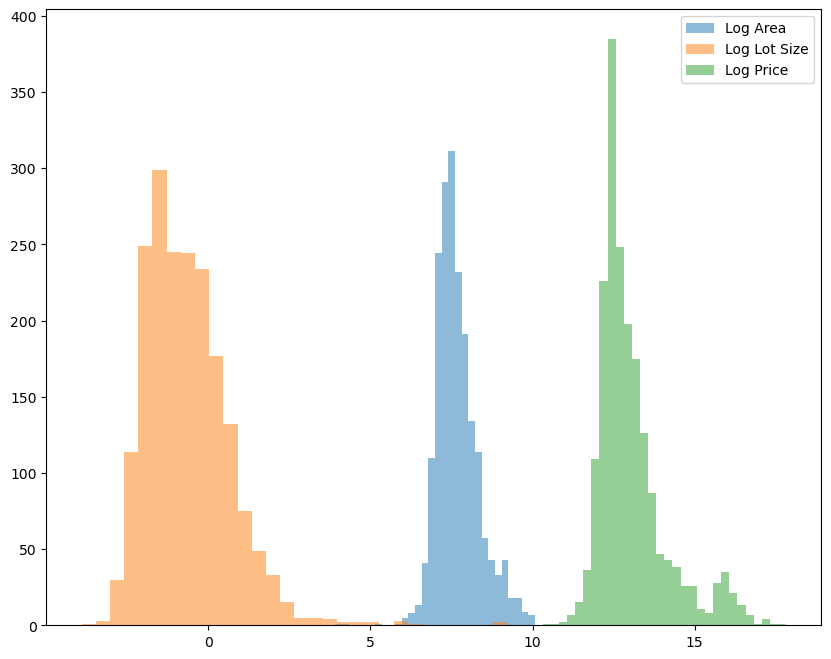

In [122]:
plt.hist(ct_homes['logAREA'], bins=30, alpha=0.5, label='Log Area')
plt.hist(ct_homes['logLOTSIZE'], bins=30, alpha=0.5, label='Log Lot Size')
plt.hist(ct_homes['logPRICE'], bins=30, alpha=0.5, label='Log Price')
plt.legend()
plt.show()

*It is preferable to use logarithms as this can transform the data to make the relationships more linear, help stabilize the variance, make the regression coefficients more interpretable, reduce the impact of extreme outliers, and achieve a more symmetric and approximately normal distribution of the dependent variable.*

Let's look at one of the descriptions as an example.

In [123]:
example = 9
ct_homes["DESCRIPTION"][example]

"One of Ridgefield's most admired homes, custom built with absolutely no expense spared. Stunning Stone and Clapboard New England Colonial with exceptional architectural details throughout, beautifully sited on 1.48 park-like acres. The heart of this home features an updated gourmet Kitchen with Dacor double ovens, Viking cook top and Sub Zero Refrigerator. Gorgeous Taj Mahal Quartz counters and island with Tumbled Limestone back splash. Stylish Living Room with propane fireplace and spacious Dining Room with large Butler's pantry also with quartz and tumbled marble. Handsome Cherry paneled Library and sun filled Family Room with fireplace and built-in cabinets and desk. The Upper level features a large Master Suite with custom marble bath and generous walk-in closet. Three Bedrooms are en suite; and two bedrooms share a lovely Jack n Jill Bathroom. Large, custom Laundry Room and over sized Bonus Room round out the second floor. Other convenient features include front and rear staircas

#### Helper functions

The following two functions will be used to clean up the text a bit and separate into tokens

In [124]:
def cleanup_description(desc):
    if type(desc) == float:
        desc = ""
    words = [re.sub(r'[^a-z]', '', w) for w in desc.lower().split(' ')]
    return ' '.join(words)

def reduce_to_vocabulary(desc, vocab):
    return ' '.join([w for w in cleanup_description(desc).split(' ') if w in vocab])


In [125]:
cleanup_description(ct_homes['DESCRIPTION'][example])

'one of ridgefields most admired homes custom built with absolutely no expense spared stunning stone and clapboard new england colonial with exceptional architectural details throughout beautifully sited on  parklike acres the heart of this home features an updated gourmet kitchen with dacor double ovens viking cook top and sub zero refrigerator gorgeous taj mahal quartz counters and island with tumbled limestone back splash stylish living room with propane fireplace and spacious dining room with large butlers pantry also with quartz and tumbled marble handsome cherry paneled library and sun filled family room with fireplace and builtin cabinets and desk the upper level features a large master suite with custom marble bath and generous walkin closet three bedrooms are en suite and two bedrooms share a lovely jack n jill bathroom large custom laundry room and over sized bonus room round out the second floor other convenient features include front and rear staircases mud room with builti


#### Next we build a vocabulary of words

In [126]:
vocab = Counter()
for dsc in ct_homes['DESCRIPTION']:
    vocab.update(cleanup_description(dsc).split(' '))


In [127]:
print("Number of unique tokens: %d" % len(vocab))

Number of unique tokens: 9738


#### Remove words that are either too common or too rare

In [128]:
vocab = Counter(token for token in vocab.elements() if vocab[token] > 5)
stop_words = [item[0] for item in vocab.most_common(50)]
vocab = Counter(token for token in vocab.elements() if token not in stop_words)
print("Number of unique tokens: %d" % len(vocab))

Number of unique tokens: 2540


#### Build a mapping between unique words and integers

In [129]:
desc = ct_homes['DESCRIPTION'][example]
print('Original description:\n---------------------')
print(desc)

print('\nCleaned up text:\n----------------')
print(cleanup_description(desc))

print('\nReduced to vocabulary:\n----------------------')
print(reduce_to_vocabulary(desc, vocab))

Original description:
---------------------
One of Ridgefield's most admired homes, custom built with absolutely no expense spared. Stunning Stone and Clapboard New England Colonial with exceptional architectural details throughout, beautifully sited on 1.48 park-like acres. The heart of this home features an updated gourmet Kitchen with Dacor double ovens, Viking cook top and Sub Zero Refrigerator. Gorgeous Taj Mahal Quartz counters and island with Tumbled Limestone back splash. Stylish Living Room with propane fireplace and spacious Dining Room with large Butler's pantry also with quartz and tumbled marble. Handsome Cherry paneled Library and sun filled Family Room with fireplace and built-in cabinets and desk. The Upper level features a large Master Suite with custom marble bath and generous walk-in closet. Three Bedrooms are en suite; and two bedrooms share a lovely Jack n Jill Bathroom. Large, custom Laundry Room and over sized Bonus Room round out the second floor. Other convenie

#### Build a mapping between unique words and integers

In [130]:
id2word = {idx: pair[0] for idx, pair in enumerate(vocab.items())}
word2id = {pair[0]: idx for idx, pair in enumerate(vocab.items())}

s = 'nyc'
print("Number of tokens mapped: %d" % len(id2word))
print("Identifier for '%s': %d" % (s,word2id[s]))
print("Word for identifier %d: %s" % (word2id[s], id2word[word2id[s]]))

Number of tokens mapped: 2540
Identifier for 'nyc': 477
Word for identifier 477: nyc


#### Map to word id format

Now, use the format required to build a language model, mapping each word to its id, 

In [131]:
tokens = []
for dsc in ct_homes['DESCRIPTION']:
    clean = reduce_to_vocabulary(cleanup_description(dsc), vocab)
    toks = clean.split(' ')
    tokens.append(toks)

In [132]:
corpus = []
for toks in tokens:
    tkn_count = Counter(toks)
    corpus.append([(word2id[item[0]], item[1]) for item in tkn_count.items()])
    
dsc = ct_homes['DESCRIPTION'][example]
clean = reduce_to_vocabulary(cleanup_description(dsc), vocab)
toks = clean.split(' ')
print("Abstract, tokenized:\n", toks, "\n")
print("Abstract, in corpus format:\n", corpus[10])

Abstract, tokenized:
 ['one', 'most', 'homes', 'custom', 'built', 'absolutely', 'no', 'expense', 'spared', 'stunning', 'stone', 'clapboard', 'england', 'colonial', 'exceptional', 'architectural', 'details', 'throughout', 'beautifully', 'sited', 'parklike', 'acres', 'heart', 'updated', 'gourmet', 'dacor', 'double', 'ovens', 'viking', 'cook', 'top', 'sub', 'refrigerator', 'gorgeous', 'quartz', 'counters', 'island', 'limestone', 'back', 'splash', 'stylish', 'propane', 'spacious', 'butlers', 'pantry', 'also', 'quartz', 'marble', 'handsome', 'cherry', 'paneled', 'library', 'sun', 'filled', 'builtin', 'cabinets', 'desk', 'upper', 'suite', 'custom', 'marble', 'generous', 'walkin', 'closet', 'three', 'are', 'en', 'suite', 'two', 'share', 'lovely', 'jack', 'n', 'jill', 'bathroom', 'custom', 'laundry', 'over', 'sized', 'bonus', 'round', 'out', 'second', 'other', 'convenient', 'include', 'front', 'rear', 'staircases', 'mud', 'builtins', 'pantry', 'utility', 'closets', 'finished', 'lower', 'second

#### Build a Topic Model with 10 topics

Note: Don't worry about the various settings used in the call to `LdaModel`. If you want to read up on these, just check out the documentation. 


In [133]:
%%time
tm = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                     id2word=id2word,
                                     num_topics=10, 
                                     random_state=100,
                                     chunksize=100,
                                     passes=10,
                                     alpha='auto',
                                     per_word_topics=True)

CPU times: user 1.93 s, sys: 5.43 ms, total: 1.94 s
Wall time: 1.94 s


In [134]:
num_topics = 10
num_words = 15
top_words = pd.DataFrame({'word rank': np.arange(1,num_words+1)})
for k in np.arange(num_topics): 
    topic = tm.get_topic_terms(k, num_words)
    words = [id2word[topic[i][0]] for i in np.arange(num_words)]
    probs = [topic[i][1] for i in np.arange(num_words)]
    top_words['topic %d' % k] = words

top_words

,word rank,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,1,create,property,spacious,waterfront,north,will,beach,guests,farm,custom
1,2,architect,it,additional,ft,boasts,roof,water,solar,farmhouse,suite
2,3,premier,own,main,sq,provides,well,sound,panels,antique,island
3,4,indoor,location,perfect,milford,state,have,views,rock,cheshire,by
4,5,shaker,at,bathroom,unique,morning,newer,long,metro,trees,pool
5,6,kayaks,can,two,built,fire,one,miles,salt,better,views
6,7,acreage,opportunity,lower,construction,many,water,post,masterpiece,association,stone
7,8,restored,close,finished,if,garden,been,steps,energy,chestnut,built
8,9,beginning,town,throughout,yale,work,by,directly,amp,original,ceilings
9,10,ny,come,beautiful,barn,coffee,ranch,across,service,historic,stunning


In [135]:
topic_dist = tm.get_document_topics(corpus[example])
topics = [pair[0] for pair in topic_dist]
probabilities = [pair[1] for pair in topic_dist]
topic_dist_table = pd.DataFrame()
topic_dist_table['Topic'] = topics
topic_dist_table['Probabilities'] = probabilities
topic_dist_table

,Topic,Probabilities
0,1,0.044947
1,2,0.308954
2,3,0.013631
3,4,0.014789
4,5,0.034338
5,9,0.568487


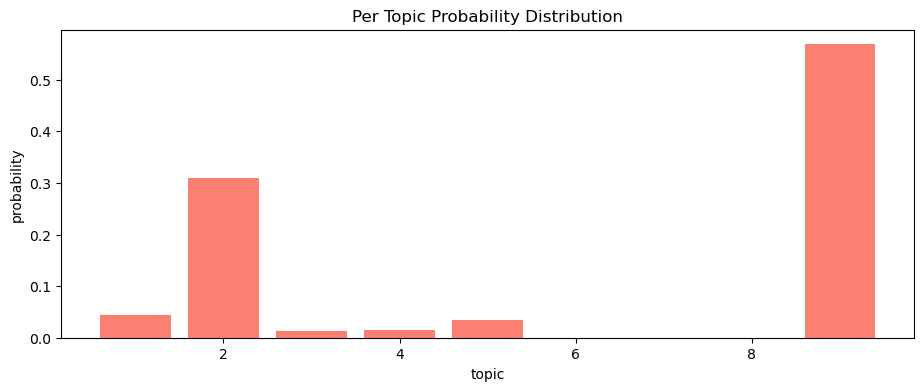

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(11,4)
plt.bar(topic_dist_table['Topic'], topic_dist_table['Probabilities'], align='center', alpha=1, color='salmon')
plt.xlabel('topic')
plt.ylabel('probability')
plt.title('Per Topic Probability Distribution')
plt.show()

### Include the topic proportions $\theta_d$ for each house 


In [137]:
num_topics = 10
theta = pd.DataFrame({"Theta0": np.zeros(ct_homes.shape[0])})
for t in np.arange(1,num_topics):
    theta["Theta"+str(t)] = np.zeros(ct_homes.shape[0])
    
for i in np.arange(ct_homes.shape[0]):
    for t in tm.get_document_topics(corpus[i]):
        theta.loc[i,"Theta"+str(t[0])] = t[1]

In [138]:
ct_topics = ct_homes.join(theta)
ct_topics

,AREA,BED,BATH,BUILT,DESCRIPTION,LOTSIZE,PRICE,logAREA,logLOTSIZE,logPRICE,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5,Theta6,Theta7,Theta8,Theta9
0,1629.0,2.0,2.0,1889.0,"Welcome home! Charming & well kept, this 2 bed...",0.159986,224000.0,7.395722,-1.832669,12.319401,0.000000,0.217734,0.307562,0.013004,0.015983,0.276440,0.000000,0.068734,0.0,0.090220
1,1278.0,3.0,2.0,1900.0,This adorable cape has a lot to offer. You st...,0.179981,225000.0,7.153052,-1.714902,12.323856,0.058219,0.071380,0.402324,0.012686,0.015574,0.241167,0.000000,0.132527,0.0,0.056359
2,1264.0,3.0,2.0,1988.0,This 1264 sqft Colonial with its 3 bedrooms an...,0.089991,224900.0,7.142037,-2.408049,12.323411,0.000000,0.585885,0.156176,0.010631,0.016616,0.139861,0.033774,0.019388,0.0,0.030921
3,2054.0,3.0,3.0,1960.0,The perfect oversized ranch awaits you at 7 No...,0.569994,370000.0,7.627544,-0.562129,12.821258,0.018890,0.024961,0.828651,0.000000,0.010879,0.073782,0.000000,0.000000,0.0,0.030548
4,4198.0,5.0,3.0,1972.0,Beautiful Colonial-3020 sqft. living space and...,0.939989,489999.0,8.342364,-0.061887,13.102159,0.000000,0.066091,0.488583,0.000000,0.036447,0.311832,0.000000,0.000000,0.0,0.076273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,848.0,3.0,2.0,1948.0,This home sets at the beginning of a Cul-de-Sa...,0.189990,429900.0,6.742881,-1.660781,12.971308,0.019154,0.141277,0.446502,0.026240,0.028841,0.262196,0.000000,0.018545,0.0,0.048959
1922,2400.0,4.0,4.0,2021.0,New home to be built. Amazing unobstructed wat...,0.079981,800000.0,7.783224,-2.525960,13.592367,0.025282,0.041325,0.539178,0.015924,0.059541,0.115156,0.075165,0.000000,0.0,0.118586
1923,6538.0,7.0,7.0,2002.0,Can you say water views galore? Wake up to the...,0.079981,2700000.0,8.785387,-2.525960,14.808762,0.000000,0.273471,0.136182,0.102196,0.023975,0.144642,0.098131,0.000000,0.0,0.212533
1924,4480.0,5.0,5.0,1890.0,NEW YEAR! NEW FUTURE! Escape NY to Connect...,0.849998,2550000.0,8.407378,-0.162521,14.751604,0.012756,0.360858,0.187796,0.103611,0.023432,0.108213,0.016014,0.012044,0.0,0.172680


#### Fit a linear model with the topic proportions included

We now fit a linear model with the topic proportions included. Note that 
the proportions satisfy $\theta_0+\theta_1+\cdots + \theta_9 = 1$. Therefore, we remove one of them, since it is redundant. If we don't do this the linear model will be harder to interpret!


In [139]:
model = sm.ols("logPRICE ~ logAREA + logLOTSIZE + BED + BATH + BUILT + Theta0 + " +
               "Theta1 + Theta2 + Theta3 + Theta4 + Theta5 + Theta6 + Theta7 + Theta8", data=ct_topics).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPRICE   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     769.3
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:19:19   Log-Likelihood:                -1036.1
No. Observations:                1926   AIC:                             2102.
Df Residuals:                    1911   BIC:                             2186.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0959      0.529     17.190      0.000       8.058      10.134
logAREA        0.4800      0.033     14.571      0.000       0.415       0.545
logLOTSIZE     0.0496      0.009      5.319      0.000       0.031       0.068
BED           -0.0081      0.013     -0.644      0.519      -0.033       0.017
BATH           0.1461      0.010     14.585      0.000       0.126       0.166
BUILT          0.0008      0.000      3.598      0.000       0.000       0.001
Theta0         1.7751      0.631      2.814      0.005       0.538       3.012
Theta1        -2.4646      0.163    -15.093      0.000      -2.785      -2.144
Theta2        -2.2093      0.140    -15.758      0.000      -2.484      -1.934
Theta3        -1.0790      0.301     -3.579      0.000      -1.670      -0.488
Theta4        -1.9870      0.294     -6.763      0.000      -2.563      -1.411
Theta5        -2.3583      0.149    -15.820      0.000      -2.651      -2.066
Theta6         3.9930      0.465      8.579      0.000       3.080       4.906
Theta7        -1.0803      0.650     -1.662      0.097      -2.355       0.194
Theta8         0.6659      0.513      1.299      0.194      -0.340       1.671
==============================================================================
Omnibus:                      127.152   Durbin-Watson:                   1.580
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              445.901
Skew:                           0.247   Prob(JB):                     1.49e-97
Kurtosis:                       5.305   Cond. No.                     1.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

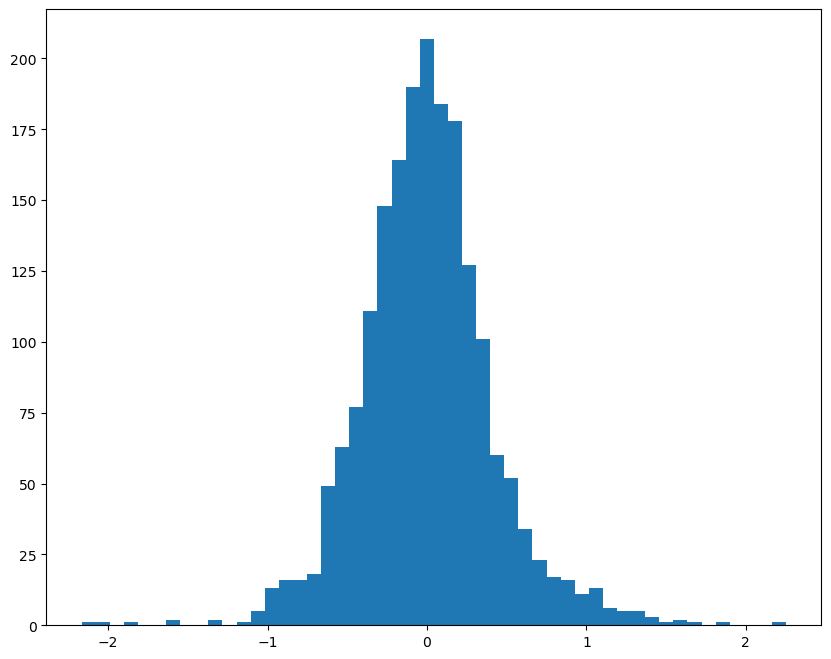

In [140]:
plt.hist(model.resid, bins=50)
plt.show()

### Model without the topics included

In [141]:
model_without_topics = sm.ols("logPRICE ~ logAREA + logLOTSIZE + BED + BATH + BUILT", data=ct_topics).fit()
model_without_topics.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPRICE   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1417.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:19:19   Log-Likelihood:                -1370.4
No. Observations:                1926   AIC:                             2753.
Df Residuals:                    1920   BIC:                             2786.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9172      0.528     11.203      0.000       4.881       6.953
logAREA        0.7285      0.035     20.723      0.000       0.660       0.797
logLOTSIZE     0.0673      0.010      6.481      0.000       0.047       0.088
BED           -0.0620      0.015     -4.214      0.000      -0.091      -0.033
BATH           0.2373      0.011     21.734      0.000       0.216       0.259
BUILT          0.0006      0.000      2.249      0.025    7.19e-05       0.001
==============================================================================
Omnibus:                      271.078   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              863.510
Skew:                           0.705   Prob(JB):                    3.10e-188
Kurtosis:                       5.961   Cond. No.                     9.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
model_without_topics.resid

0      -0.272506
1      -0.043402
2      -0.038549
3      -0.240178
4      -0.396467
          ...   
1921    0.872275
1922    0.340150
1923    0.311226
1924    0.783841
1925    0.854224
Length: 1926, dtype: float64

#### 2.2 Plot the residuals

On a single plot, show a histogram of the residuals of the model without the topics, 
and the residuals of the model with the topics. Give a legend that shows which is which.
Comment on the results. 


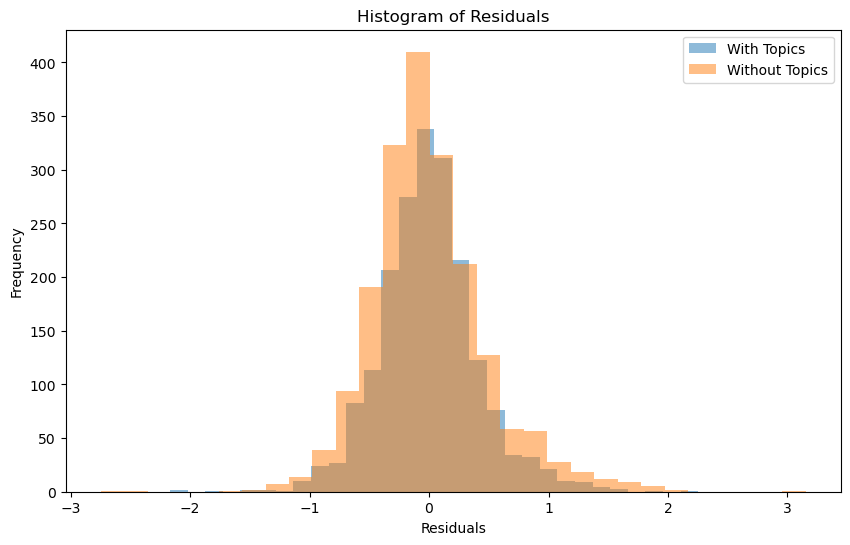

In [143]:
# your code here
plt.figure(figsize=(10, 6))

plt.hist(model.resid, bins=30, alpha=0.5, label='With Topics')
plt.hist(model_without_topics.resid, bins=30, alpha=0.5, label='Without Topics')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

plt.show()

*The plot shows that the residuals appear larger on average (more spread over the x axis) for the model without topics.*

#### 2.3 Quantify the improvement: R-squared

How do the two models compare in terms of R-squared? What do these numbers mean?


*R-squared represents the proportion of the variance for the dependent variable that's explained by the independent variables in the model. A higher R-squared value means that the model explains more variability of the response data around its mean. Therefore, the model without residuals explains more variability than the model with residuals.*

#### 2.4 Quantify the improvement: MSE decrease

What is the percent decrease in the mean-squared-error of the model with the topics
compared to the model that ignores the descriptions?


In [144]:
# [your code and markdown here]
from sklearn.metrics import mean_squared_error

mse_with_topics = mean_squared_error(ct_homes['logPRICE'], model.fittedvalues)
mse_without_topics = mean_squared_error(ct_homes['logPRICE'], model_without_topics.fittedvalues)

percent_decrease = ((mse_without_topics - mse_with_topics) / mse_without_topics) * 100

print(f"Percent decrease in MSE: {percent_decrease:.2f}%")

Percent decrease in MSE: 29.33%


#### 2.5 Quantify the improvement: LOOCV

What is the percent decrease in the leave-one-out-cross-validation (LOOCV) error?
Recall from class that the following formula can be used to calculate this:

<img src="https://raw.githubusercontent.com/YData123/sds265-fa21/main/assignments/assn6/loocv.png" width="410" align="center">

<br>

The following line of code computes this for one of the models:

`np.mean((model.resid/(1 - model.get_influence().hat_matrix_diag))**2)`

In [145]:
# your code here 
loocv_with_topics = np.mean((model.resid/(1 - model.get_influence().hat_matrix_diag))**2)
loocv_without_topics = np.mean((model_without_topics.resid/(1 - model_without_topics.get_influence().hat_matrix_diag))**2)

# print(f"LOOCV with topics: {loocv_with_topics}")
# print(f"LOOCV without topics: {loocv_without_topics}")

percent_decrease2 = ((loocv_without_topics - loocv_with_topics) / loocv_without_topics) * 100

print(f"Percent decrease in LOOCV Error: {percent_decrease2:.2f}%")

Percent decrease in LOOCV Error: 28.45%


#### 2.6 Repeat for three topics 

Now, repeat the above steps for a topic model that is trained using only three (3) topics. Specifically:

1. Train a model with three topics
1. Display the top words in each of the three topics
1. Augment the `ct_homes` data with the resulting topic proportions $\theta$
1. Fit a linear model *using only the first two of the three* proportions
1. Plot a histogram of the residuals of the three linear models together
1. Comment on the improvement over the baseline in terms of R-squared, MSE, and LOOCV compared with the previous two models.


In [146]:
# your code and markdown here
num_topics = 3
num_words = 15
top_words = pd.DataFrame({'word rank': np.arange(1,num_words+1)})
for k in np.arange(num_topics): 
    topic = tm.get_topic_terms(k, num_words)
    words = [id2word[topic[i][0]] for i in np.arange(num_words)]
    probs = [topic[i][1] for i in np.arange(num_words)]
    top_words['topic %d' % k] = words
top_words

,word rank,topic 0,topic 1,topic 2
0,1,create,property,spacious
1,2,architect,it,additional
2,3,premier,own,main
3,4,indoor,location,perfect
4,5,shaker,at,bathroom
5,6,kayaks,can,two
6,7,acreage,opportunity,lower
7,8,restored,close,finished
8,9,beginning,town,throughout
9,10,ny,come,beautiful


In [147]:
num_topics = 3
theta2 = pd.DataFrame({"Theta0": np.zeros(ct_homes.shape[0])})
for t in np.arange(1,num_topics):
    theta2["Theta"+str(t)] = np.zeros(ct_homes.shape[0])
    
for i in np.arange(ct_homes.shape[0]):
    for t in tm.get_document_topics(corpus[i]):
        theta2.loc[i,"Theta"+str(t[0])] = t[1]
        
ct_topics2 = ct_homes.join(theta2)
ct_topics2

,AREA,BED,BATH,BUILT,DESCRIPTION,LOTSIZE,PRICE,logAREA,logLOTSIZE,logPRICE,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5,Theta7,Theta9,Theta6,Theta8
0,1629.0,2.0,2.0,1889.0,"Welcome home! Charming & well kept, this 2 bed...",0.159986,224000.0,7.395722,-1.832669,12.319401,0.000000,0.217727,0.307567,0.013023,0.015986,0.276433,0.068722,0.090220,NaN,NaN
1,1278.0,3.0,2.0,1900.0,This adorable cape has a lot to offer. You st...,0.179981,225000.0,7.153052,-1.714902,12.323856,0.058219,0.071391,0.402326,0.012686,0.015574,0.241153,0.132528,0.056359,NaN,NaN
2,1264.0,3.0,2.0,1988.0,This 1264 sqft Colonial with its 3 bedrooms an...,0.089991,224900.0,7.142037,-2.408049,12.323411,0.000000,0.585881,0.156185,0.010630,0.016603,0.139868,0.019388,0.030921,0.033774,NaN
3,2054.0,3.0,3.0,1960.0,The perfect oversized ranch awaits you at 7 No...,0.569994,370000.0,7.627544,-0.562129,12.821258,0.018890,0.024961,0.828650,NaN,0.010879,0.073786,NaN,0.030546,NaN,NaN
4,4198.0,5.0,3.0,1972.0,Beautiful Colonial-3020 sqft. living space and...,0.939989,489999.0,8.342364,-0.061887,13.102159,0.000000,0.066092,0.488586,NaN,0.036454,0.311823,NaN,0.076273,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921,848.0,3.0,2.0,1948.0,This home sets at the beginning of a Cul-de-Sa...,0.189990,429900.0,6.742881,-1.660781,12.971308,0.019154,0.141272,0.446494,0.026240,0.028841,0.262210,0.018545,0.048958,NaN,NaN
1922,2400.0,4.0,4.0,2021.0,New home to be built. Amazing unobstructed wat...,0.079981,800000.0,7.783224,-2.525960,13.592367,0.025282,0.041325,0.539177,0.015924,0.059542,0.115156,NaN,0.118587,0.075164,NaN
1923,6538.0,7.0,7.0,2002.0,Can you say water views galore? Wake up to the...,0.079981,2700000.0,8.785387,-2.525960,14.808762,0.000000,0.273473,0.136178,0.102196,0.023975,0.144639,NaN,0.212538,0.098131,NaN
1924,4480.0,5.0,5.0,1890.0,NEW YEAR! NEW FUTURE! Escape NY to Connect...,0.849998,2550000.0,8.407378,-0.162521,14.751604,0.012756,0.360859,0.187792,0.103611,0.023432,0.108215,0.012044,0.172682,0.016014,NaN


In [148]:
theta2

,Theta0,Theta1,Theta2,Theta3,Theta4,Theta5,Theta7,Theta9,Theta6,Theta8
0,0.000000,0.217727,0.307567,0.013023,0.015986,0.276433,0.068722,0.090220,NaN,NaN
1,0.058219,0.071391,0.402326,0.012686,0.015574,0.241153,0.132528,0.056359,NaN,NaN
2,0.000000,0.585881,0.156185,0.010630,0.016603,0.139868,0.019388,0.030921,0.033774,NaN
3,0.018890,0.024961,0.828650,NaN,0.010879,0.073786,NaN,0.030546,NaN,NaN
4,0.000000,0.066092,0.488586,NaN,0.036454,0.311823,NaN,0.076273,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1921,0.019154,0.141272,0.446494,0.026240,0.028841,0.262210,0.018545,0.048958,NaN,NaN
1922,0.025282,0.041325,0.539177,0.015924,0.059542,0.115156,NaN,0.118587,0.075164,NaN
1923,0.000000,0.273473,0.136178,0.102196,0.023975,0.144639,NaN,0.212538,0.098131,NaN
1924,0.012756,0.360859,0.187792,0.103611,0.023432,0.108215,0.012044,0.172682,0.016014,NaN


In [149]:
model2 = sm.ols("logPRICE ~ logAREA + logLOTSIZE + BED + BATH + BUILT + Theta0 + Theta1", data=ct_topics2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPRICE   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1066.
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:19:20   Log-Likelihood:                -1330.0
No. Observations:                1926   AIC:                             2676.
Df Residuals:                    1918   BIC:                             2720.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2242      0.541     11.514      0.000       5.164       7.284
logAREA        0.6922      0.035     19.530      0.000       0.623       0.762
logLOTSIZE     0.0680      0.010      6.679      0.000       0.048       0.088
BED           -0.0594      0.014     -4.117      0.000      -0.088      -0.031
BATH           0.2239      0.011     20.661      0.000       0.203       0.245
BUILT          0.0006      0.000      2.278      0.023    7.85e-05       0.001
Theta0         5.8448      0.697      8.387      0.000       4.478       7.211
Theta1        -0.4221      0.127     -3.326      0.001      -0.671      -0.173
==============================================================================
Omnibus:                      270.361   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              784.001
Skew:                           0.732   Prob(JB):                    5.71e-171
Kurtosis:                       5.762   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

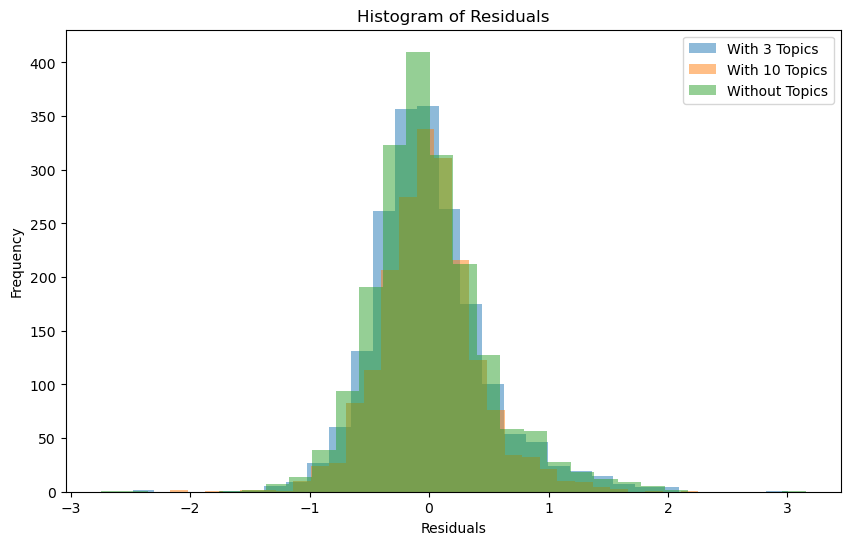

In [150]:
plt.figure(figsize=(10, 6))

plt.hist(model2.resid, bins=30, alpha=0.5, label='With 3 Topics')
plt.hist(model.resid, bins=30, alpha=0.5, label='With 10 Topics')
plt.hist(model_without_topics.resid, bins=30, alpha=0.5, label='Without Topics')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [151]:
from sklearn.metrics import mean_squared_error

mse_with_topics = mean_squared_error(ct_homes['logPRICE'], model.fittedvalues)
mse_without_topics = mean_squared_error(ct_homes['logPRICE'], model_without_topics.fittedvalues)

percent_decrease = ((mse_without_topics - mse_with_topics) / mse_without_topics) * 100

print(f"Percent decrease in MSE from 10 topics to no topics: {percent_decrease:.2f}%")

mse_with_topics = mean_squared_error(ct_homes['logPRICE'], model2.fittedvalues)
mse_without_topics = mean_squared_error(ct_homes['logPRICE'], model_without_topics.fittedvalues)

percent_decrease = ((mse_without_topics - mse_with_topics) / mse_without_topics) * 100

print(f"Percent decrease in MSE from 3 topics to no topics: {percent_decrease:.2f}%")

loocv_with_topics = np.mean((model.resid/(1 - model.get_influence().hat_matrix_diag))**2)
loocv_without_topics = np.mean((model_without_topics.resid/(1 - model_without_topics.get_influence().hat_matrix_diag))**2)

print(f"LOOCV with topics: {loocv_with_topics}")
print(f"LOOCV without topics: {loocv_without_topics}")

Percent decrease in MSE from 10 topics to no topics: 29.33%
Percent decrease in MSE from 3 topics to no topics: 4.11%
LOOCV with topics: 0.1769766773091103
LOOCV without topics: 0.24733877014173955


*A percent decrease of 4.11% in MSE when topics are included suggests that the model with topics is more accurate in its predictions than the baseline, however 29.33% is clearly a significantly higher decrease. Lower LOOCV values indicate better generalization. The LOOCV with topics is 0.2376, compared to 0.2473 for the model without topics. The decrease in LOOCV when including topics shows that the model is likely to perform better on unseen data. The histogram shows taller bars for the model without topics, implying a higher frequency of larger residuals in the baseline model Looking at bar height across all models, the 10 topic model has the tallest bars, followed by the three topic model, then the model without topics. This is also evidenced in the percent decreases.. This suggests that the baseline model's predictions are less consistent with the actual values, resulting in a wider spread of errors, and the more topics included, the more accurate the model.*

#### 2.7 Interpretation

Now, interpret the model. Use the coefficients of the linear model to 
help interpret the meaning of the topics. Comment on what this says 
about the effectiveness of the topic model for predicting the sale price 
of the house. Does it make intuitive sense? Why or why not?


In [152]:
coefficients = model.params
print(coefficients)

Intercept     9.095927
logAREA       0.479995
logLOTSIZE    0.049623
BED          -0.008142
BATH          0.146050
BUILT         0.000814
Theta0        1.775088
Theta1       -2.464620
Theta2       -2.209255
Theta3       -1.078974
Theta4       -1.986978
Theta5       -2.358289
Theta6        3.992959
Theta7       -1.080261
Theta8        0.665907
dtype: float64


*The coefficients from the linear regression model indicate that larger living areas and more bathrooms positively impact house sale prices, which is intuitive since these features typically add value. Surprisingly, the number of bedrooms has a slight negative association with price, possibly suggesting that beyond a certain point, additional bedrooms do not add as much value or could be indicative of smaller room sizes. The topics represented by Theta0 and Theta1 have significant positive and negative impacts on sale prices, respectively, demonstrating that the topic model effectively captures key descriptive elements that influence house valuation. The large positive coefficient for Theta0 could represent highly desirable property attributes, while the negative coefficient for Theta1 might correspond to less attractive features. Overall, the model's coefficients suggest that incorporating topic proportions from house descriptions provides meaningful insights for predicting sale prices.*

## Problem 3: Inside Out: Deep neural networks with tensorflow

In class, we discussed a "bare bones" implementation of a 2-layer neural network for classification, using rectified linear units as activation functions. 
This implementation only uses the `numpy` package. In practice, we don't need to implement each component of a neural network from scratch. There exists software libraries like Tensorflow and PyTorch which make the process of building and training neural networks much faster. At their core, such libraries implement automatic differentiation so that the use only needs to define the "forward pass" of their model, and, as long as they do so within the framework, the gradients can be computed automatically. In addition, these libraries also have many built-in definitions of common neural network components. [Tensorflow](https://www.tensorflow.org/) is an open-source package for building and training neural networks. We will use it in this problem to explore applying neural networks to some synthetic classification tasks.

Recall that a 2-layer neural network for classification takes the following form,
\begin{aligned}
    h_{1} &=\operatorname{ReLU}\left(W_{1} X+b_{1}\right) \\
    p &=\operatorname{Softmax}\left(W_{2} h_{1}+b_{2}\right).
\end{aligned}
where $X$ is the input. The number of layers is referred to as the "depth" of a neural network. We can construct neural networks with arbitrary depth via the following architecture,
\begin{aligned}
    h_{1} &=\operatorname{ReLU}\left(W_{1} X+b_{1}\right) \\
    h_{2} &=\operatorname{ReLU}\left(W_{2} h_1 + b_{2}\right) \\
    h_{3} &=\operatorname{ReLU}\left(W_{3} h_2 + b_{3}\right) \\
    &\vdots\\
    p &=\operatorname{Softmax}\left(W_{\ell} h_{\ell-1}+b_{\ell}\right).
\end{aligned}
This is an $\ell$-layer neural network. The $i$-th layer takes the output of the previous layer, $h_{i-1}$ as input, and produces $h_i$. The parameters of the $i$-th layer are the weights matrix $W_i$ and the bias vector $b_i$. The nonlinear activation function is $\operatorname{ReLU}$ at each hidden layer, and $\operatorname{Softmax}$ at the output layer.

In this problem, we will learn how to train deep neural networks with Tensorflow and apply them to synthetic classification tasks. 

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf
from tqdm.keras import TqdmCallback

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['axes.facecolor'] = 'lightgray'

First we generate and plot a spiral dataset that contains $K=3$ classes.

In [154]:
def generate_spirals(N=100, K=3, noise=0.3):
    D = 2  # dimensionality
    X = np.zeros((N*K, D))
    y = np.zeros(N*K, dtype='uint8')
    for j in range(K):
        ix = range(N*j, N*(j+1))
        r = np.linspace(0.0, 1, N)  # radius
        t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*noise  
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    return X, y

def plot_data(X, y):
    fig = plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(np.min(X[:,0])-.1, np.max(X[:,0])+.1)
    plt.ylim(np.min(X[:,1])-.1, np.max(X[:,1])+.1)


def plot_classifier(X, y, model):
    h = 0.015
    x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
    y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Z = np.dot(np.maximum(
    #     0, np.dot(np.c_[xx.ravel(), yy.ravel()], W1) + b1), W2) + b2
    inputs = np.array([xx.ravel(), yy.ravel()]).T
    Z = model(inputs)
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
def plot_history(history, val=False, figsize=(8,3)):
    '''plot given attributes from training history'''
    plot_attrs = ('loss', 'accuracy')
    fig, axs = plt.subplots(ncols=len(plot_attrs), figsize=figsize)

    if not all(plot_attr in history.history for plot_attr in plot_attrs):
        raise ValueError('not all `plot_attrs` are in the history object')

    for plot_attr, ax in zip(plot_attrs, axs):
        ax.plot(history.history[plot_attr], label=plot_attr)
        if val:
            ax.plot(history.history[f'val_{plot_attr}'], label=f'val_{plot_attr}')
        ax.set_ylabel(plot_attr)
        ax.set_xlabel('epoch')
        ax.legend(loc='upper right')

    return fig

def train_neurnet(neurnet, X, y, X_val, y_val, n_epochs=1_000, batch_size=128):
    neurnet.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    history = neurnet.fit(
        X, y, validation_data=(X_val, y_val), epochs=n_epochs, batch_size=batch_size, verbose=0,
        callbacks=[TqdmCallback(data_size = len(y), batch_size=batch_size, verbose=0)])
    plot_history(history, val=True);
    return history

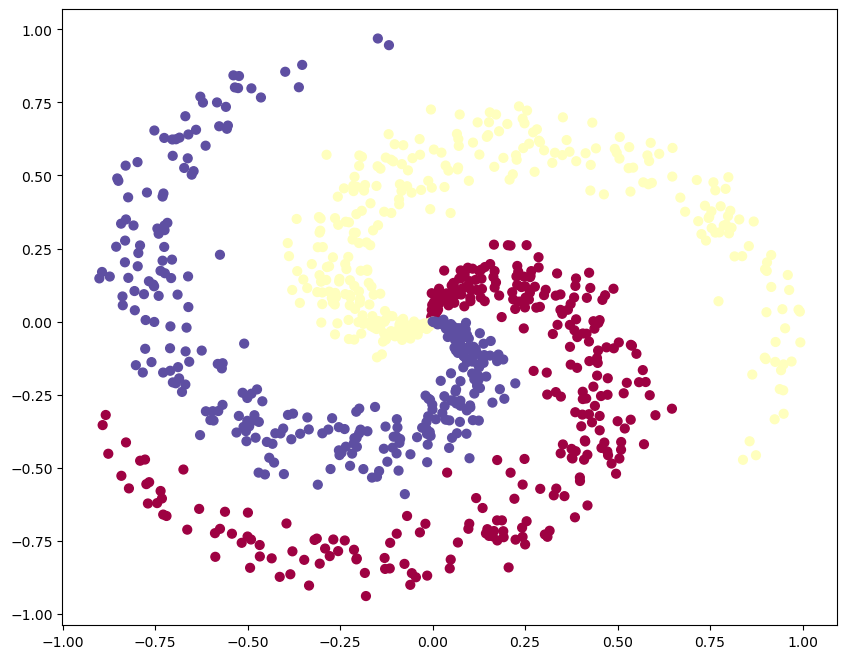

In [155]:
X_spiral, y_spiral = generate_spirals(N=300, K=3)
X_spiral_val, y_spiral_val = generate_spirals(N=50, K=3)
X_spiral_test, y_spiral_test = generate_spirals(N=300, K=3)
plot_data(X_spiral, y_spiral)

Now, let's train a 2-layer neural network to classify this dataset.

In [156]:
# demo of neurnet
neurnet = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=3, activation='softmax')
    ])

neurnet.build(input_shape=(None, 2))
neurnet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                192       
                                                                 
 dense_14 (Dense)            (None, 3)                 195       
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

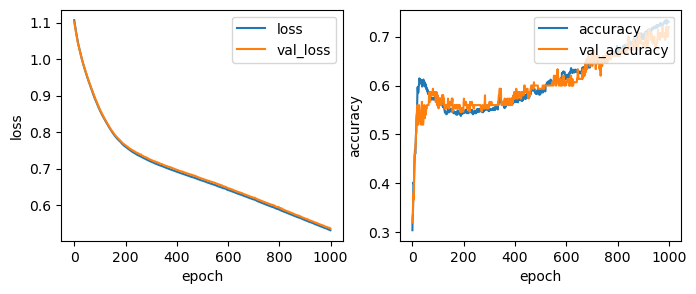

In [157]:
history = train_neurnet(neurnet, X_spiral, y_spiral, X_spiral_val, y_spiral_val, n_epochs=1_000)

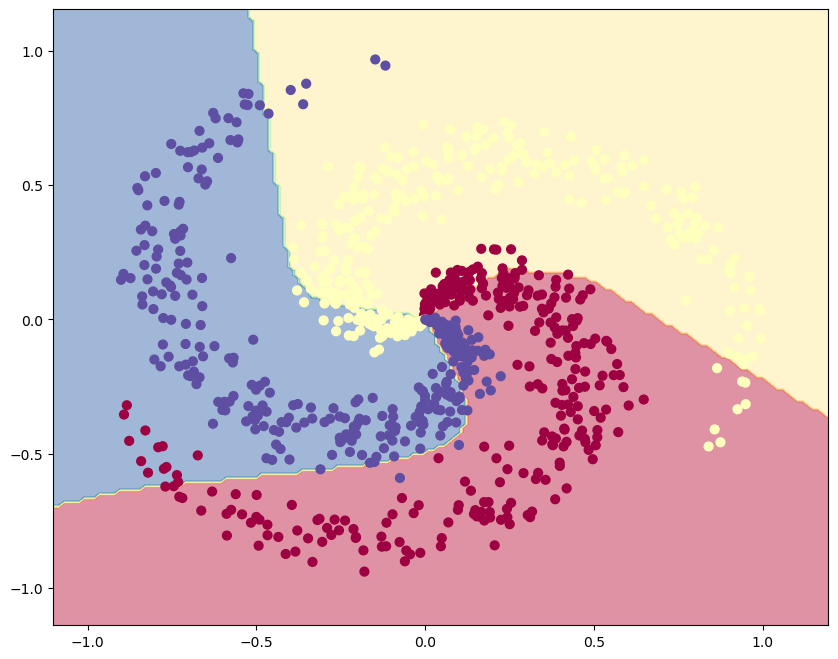

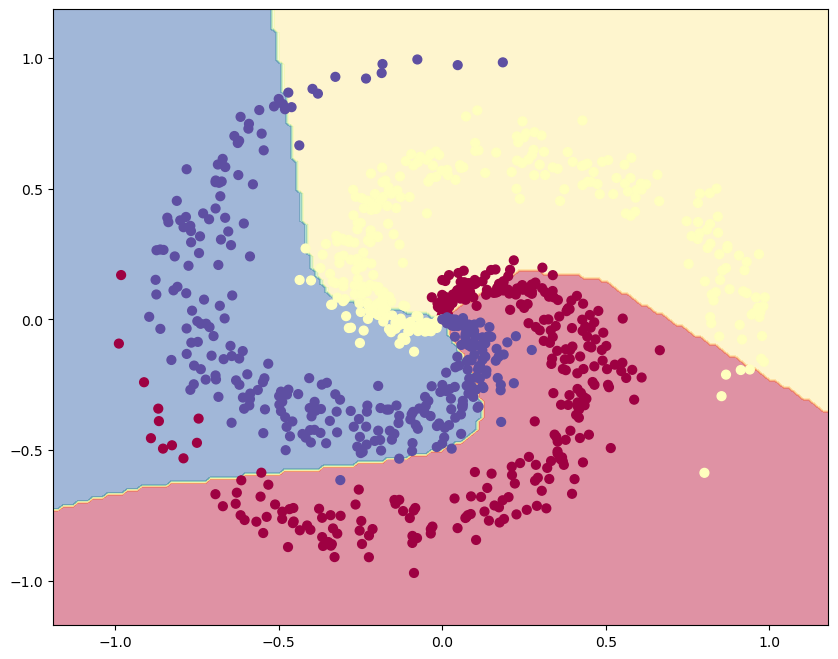

In [158]:
plot_classifier(X_spiral, y_spiral, neurnet)
plot_classifier(X_spiral_test, y_spiral_test, neurnet)

### Problem 3.1: Experiment with different architectures and hyperparameters settings

[Tensorflow playground](https://playground.tensorflow.org/) is a tool created by Tensorflow to demo how neural networks work, allowing users to tinker with different architectures on a few toy classification tasks (in fact, the same ones we are playing with in this problem). Under the hood, Tensorflow playground is running code like the one we are using in this notebook. Feel free to explore Tensorflow playground first before we continuing with this problem.

Using the above code, experiment with different architectures and hyperparameters of the optimization. In particular, try the following two variations.
1. Wider network. Increase the number of hidden units in the 2-layer network above. (hint: use the `units` argument in `layers.Dense`)
2. Deeper network. Increase the depth of the network by adding an additional hidden layer. (hint: add an additional `layers.Dense`)

For each variant, define your network using tensorflow, train it on the spiral data, visualize the decision boundaries, and include a markdown cell briefly describing what you observe. Feel free to add some additional variants as well. For example, you could train for longer, change the activation functions, etc.

**Wider network**

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               384       
                                                                 
 dense_16 (Dense)            (None, 3)                 387       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

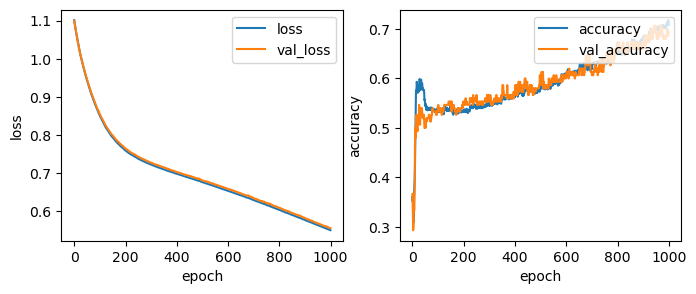

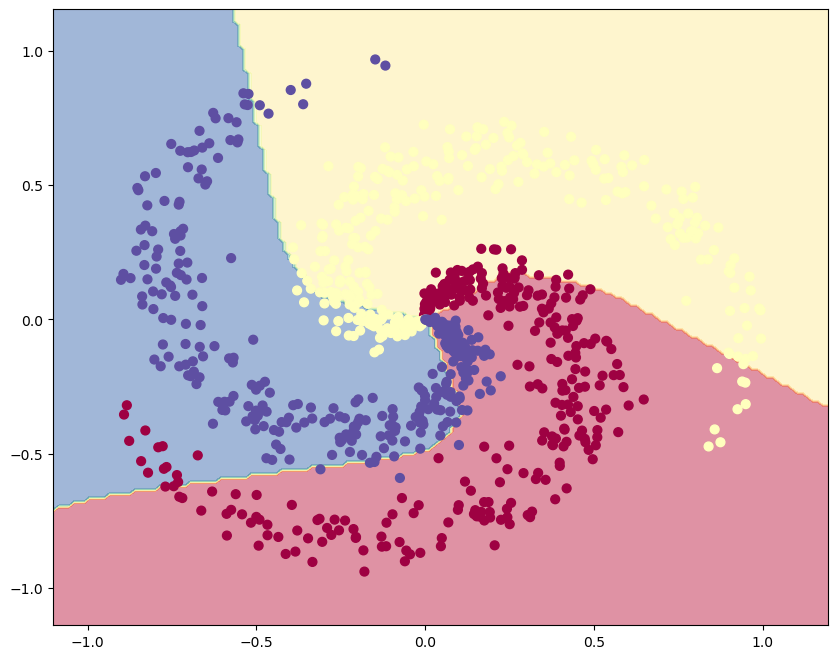

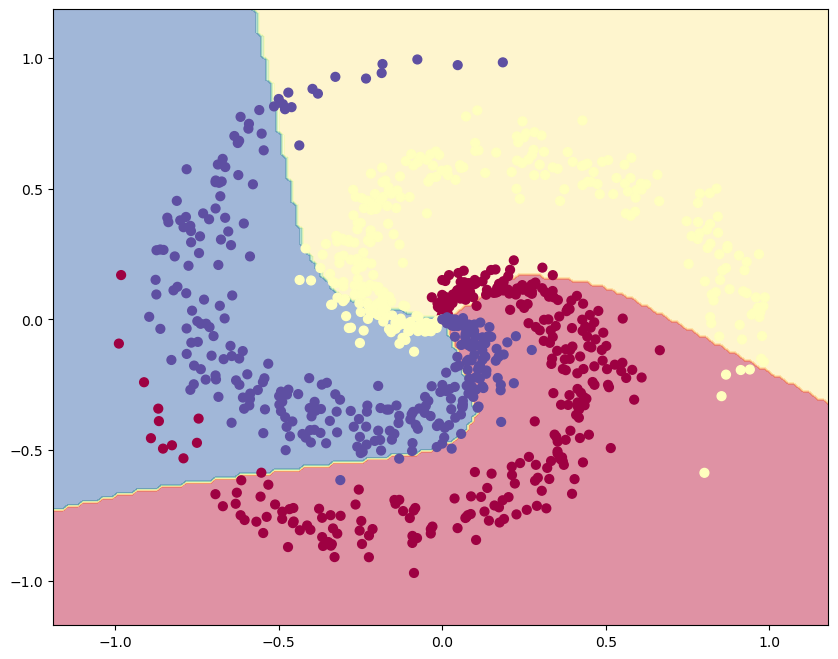

In [159]:
wider_neurnet = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=128, activation='relu'),  # Increased number of units
        tf.keras.layers.Dense(units=3, activation='softmax')
    ])

wider_neurnet.build(input_shape=(None, 2))
wider_neurnet.summary()

# train network
history_wider = train_neurnet(wider_neurnet, X_spiral, y_spiral, X_spiral_val, y_spiral_val, n_epochs=1_000)

# visualize decision boundaries
plot_classifier(X_spiral, y_spiral, wider_neurnet)
plot_classifier(X_spiral_test, y_spiral_test, wider_neurnet)

**Deeper network**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                192       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 3)                 195       
                                                                 
Total params: 4,547
Trainable params: 4,547
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

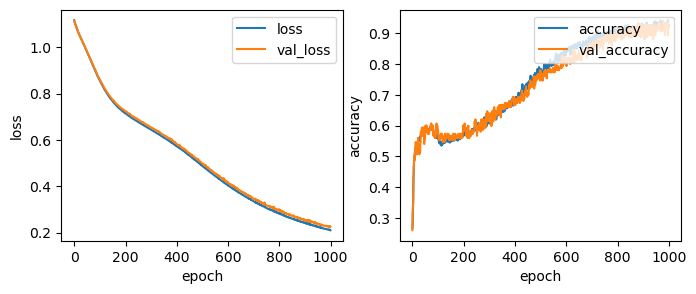

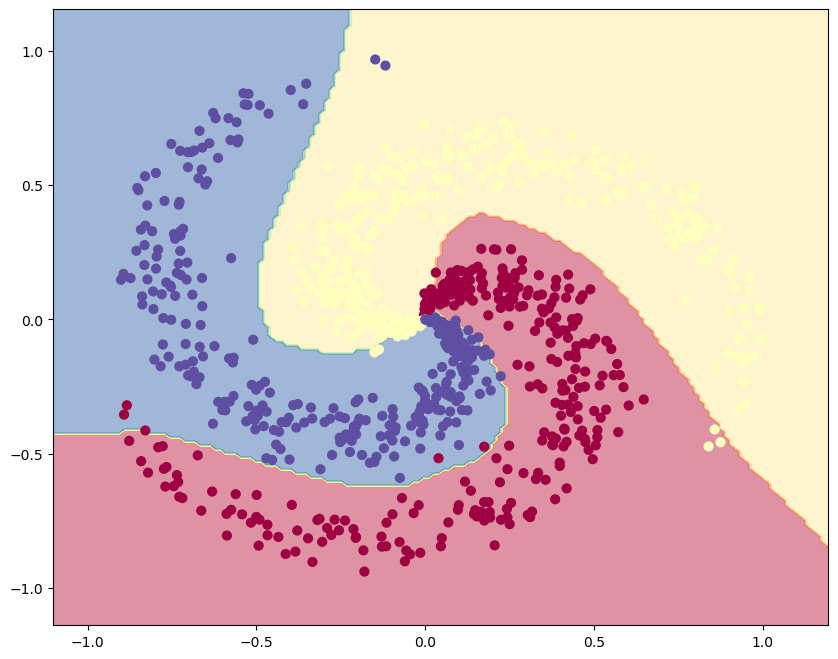

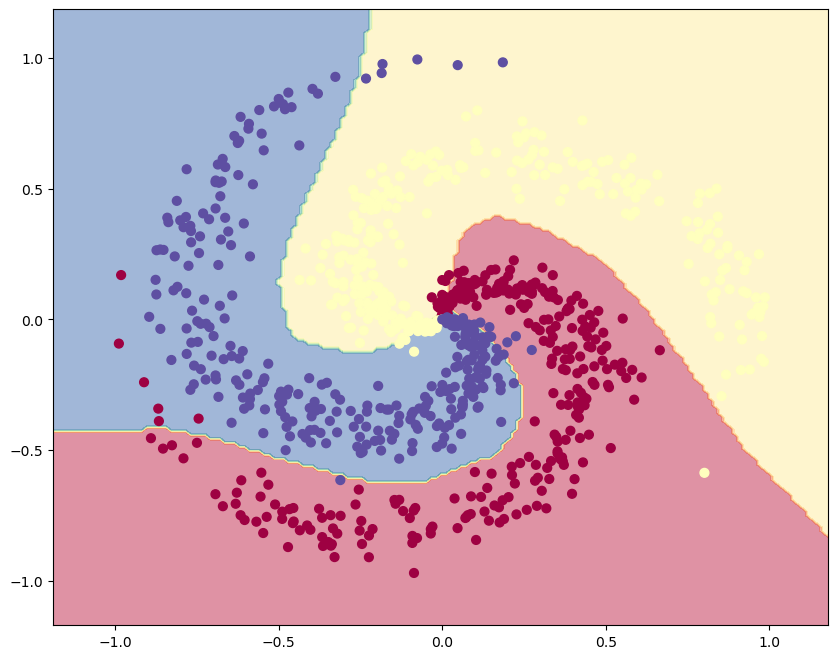

In [160]:
deeper_neurnet = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=64, activation='relu'),  # Additional hidden layer
        tf.keras.layers.Dense(units=3, activation='softmax')
    ])

deeper_neurnet.build(input_shape=(None, 2))
deeper_neurnet.summary()

# train network
history_deeper = train_neurnet(deeper_neurnet, X_spiral, y_spiral, X_spiral_val, y_spiral_val, n_epochs=1_000)

# visualize decision boundaries
plot_classifier(X_spiral, y_spiral, deeper_neurnet)
plot_classifier(X_spiral_test, y_spiral_test, deeper_neurnet)

### Problem 3.2: Apply to three other toy datasets

Now, choose an architecture you like and apply your neural network to three more synthetic classification tasks generated by sklearn. For each of the following, define your neural network, train it on the dataset, and visualize the decision boundary. Similar to the above, feel free to experiment with different architectures to improve the performance of your neural network on each task.

#### "Circles"

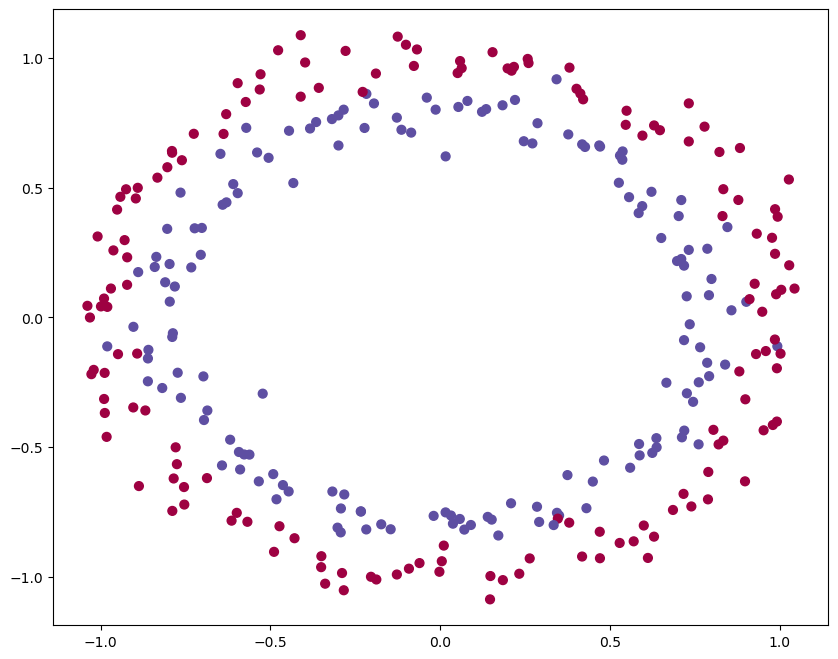

In [161]:
from sklearn import datasets

# generate circles
X_circles, y_circles = datasets.make_circles(300, noise=0.06, random_state=265)
X_circles_val, y_circles_val = datasets.make_circles(100, noise=0.06, random_state=565)
X_circles_test, y_circles_test = datasets.make_circles(300, noise=0.06, random_state=565)

plot_data(X_circles, y_circles)


The first toy dataset forms two concentered circles with different radius, and we add a little bit of noise so that two circles start mixing together. Train a neural network on this taks.

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                192       
                                                                 
 dense_21 (Dense)            (None, 2)                 130       
                                                                 
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

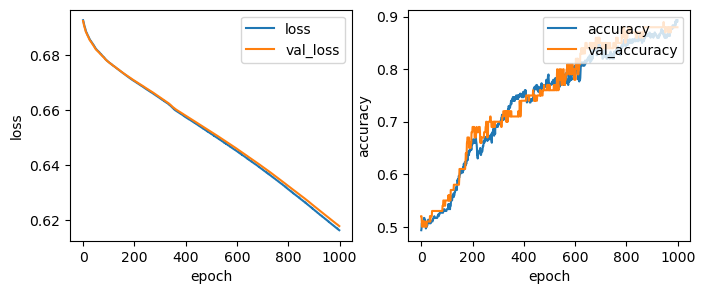

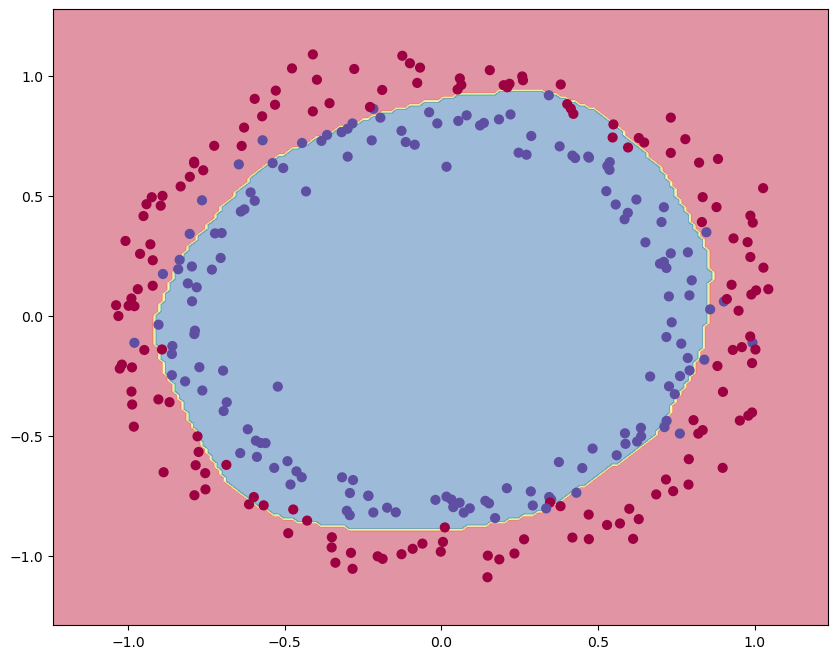

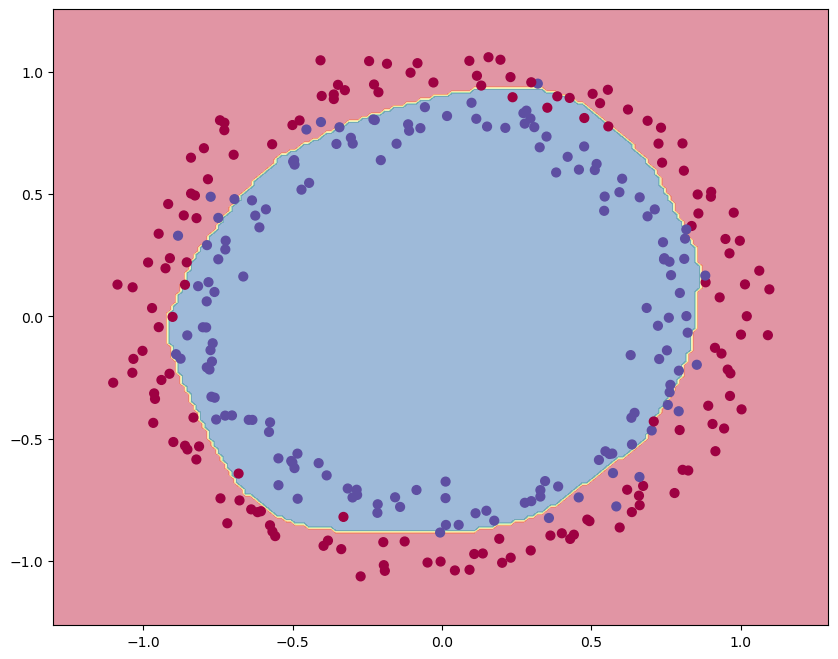

In [162]:
neurnet_circles = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=2, activation='softmax')
    ])

neurnet_circles.build(input_shape=(None, 2))
neurnet_circles.summary()

# train network
train_neurnet(neurnet_circles, X_circles, y_circles, X_circles_val, y_circles_val, n_epochs=1_000)

# visualize decision boundaries
plot_classifier(X_circles, y_circles, neurnet_circles)
plot_classifier(X_circles_test, y_circles_test, neurnet_circles)

#### "Blobs"

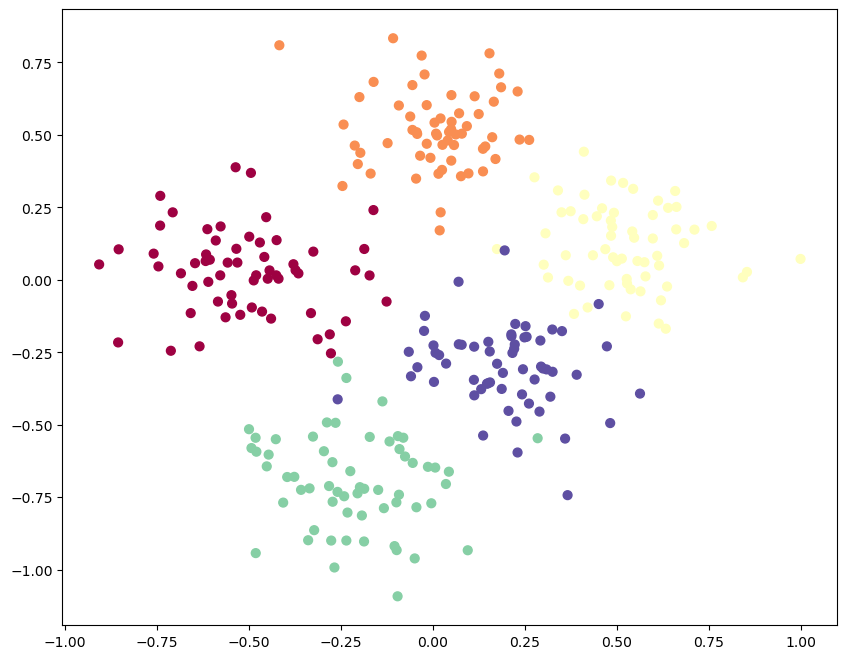

In [163]:
# generate blobs
centers = np.array([[-.5,.0],[0,.5], [.5,.1], [-.2, -.7], [.2, -.3]])
X_blobs, y_blobs = datasets.make_blobs(300, centers=centers, cluster_std=.15, center_box=(-1.0, 1.0), random_state=265)
X_blobs_val, y_blobs_val = datasets.make_blobs(100, centers=centers, cluster_std=.15, center_box=(-1.0, 1.0), random_state=565)
X_blobs_test, y_blobs_test = datasets.make_blobs(300, centers=centers, cluster_std=.15, center_box=(-1.0, 1.0), random_state=565)

plot_data(X_blobs, y_blobs)

The second dataset forms three clusters centered at different places. Repeat the procedure that you have walked through for the first dataset. Note that this time the number of classes is 5 not 3, so you'll have to adjust the number of units in the final unit accordingly.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                192       
                                                                 
 dense_23 (Dense)            (None, 5)                 325       
                                                                 
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

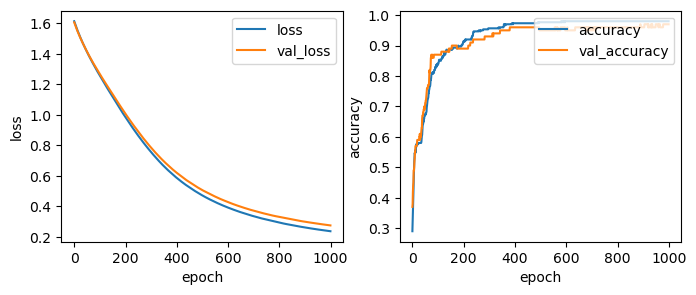

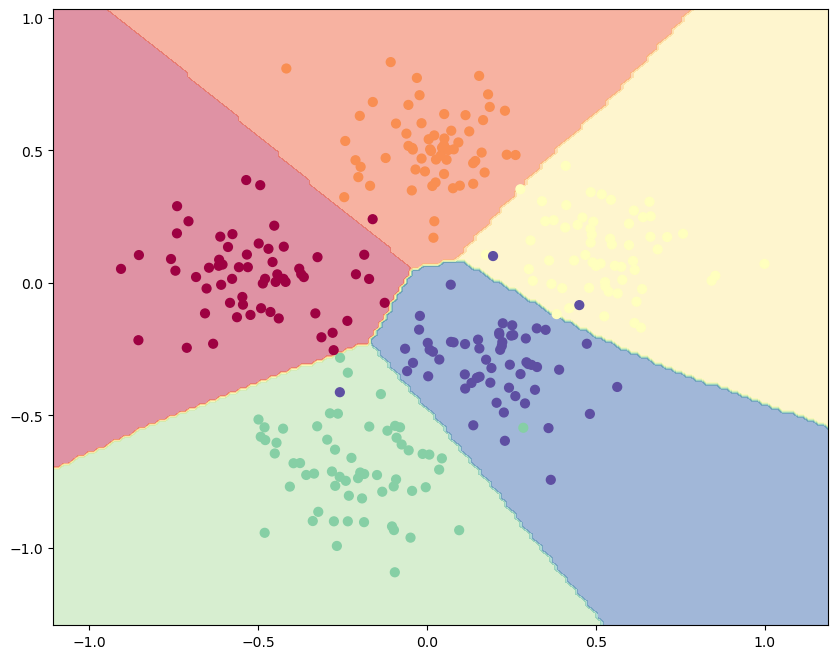

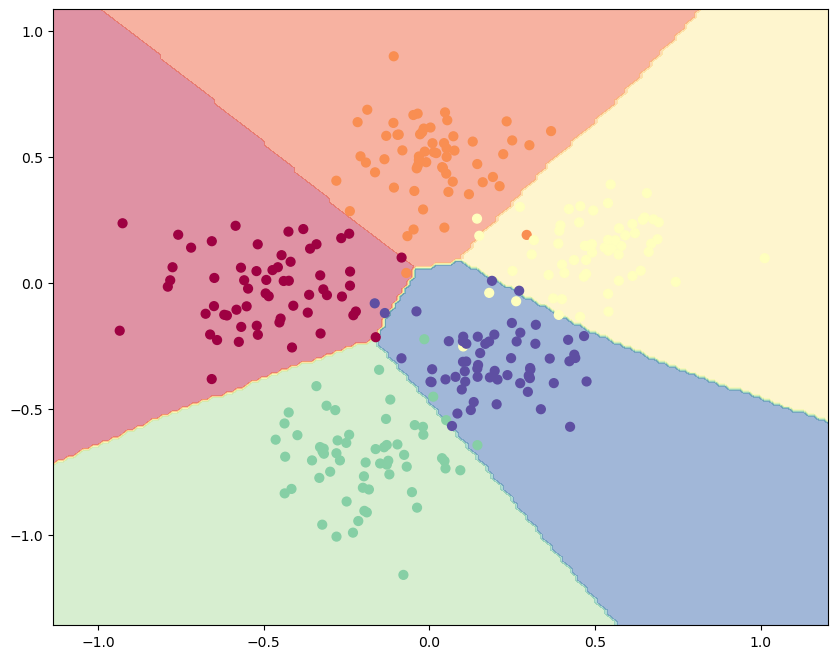

In [164]:
neurnet_blobs = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=5, activation='softmax')  # 5 units for 5 classes
    ])

neurnet_blobs.build(input_shape=(None, 2))
neurnet_blobs.summary()

# train network
train_neurnet(neurnet_blobs, X_blobs, y_blobs, X_blobs_val, y_blobs_val, n_epochs=1_000)

# visualize decision boundaries
plot_classifier(X_blobs, y_blobs, neurnet_blobs)
plot_classifier(X_blobs_test, y_blobs_test, neurnet_blobs)

#### "Moons"

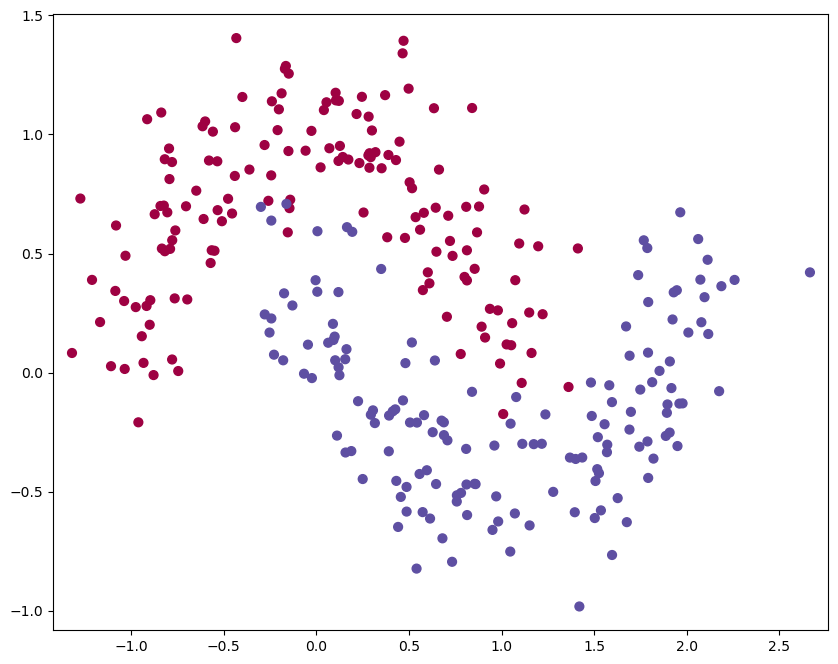

In [165]:
# generate moons
X_moons, y_moons = datasets.make_moons(300, noise=0.2, random_state=265)
X_moons_val, y_moons_val = datasets.make_moons(100, noise=0.2, random_state=565)
X_moons_test, y_moons_test = datasets.make_moons(300, noise=0.2, random_state=565)

plot_data(X_moons, y_moons)

The third dataset is composed of two moon-shaped clusters. Repeat the procedures above on this dataset. Note that the number of classes is 2 now.

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                192       
                                                                 
 dense_25 (Dense)            (None, 2)                 130       
                                                                 
Total params: 322
Trainable params: 322
Non-trainable params: 0
_________________________________________________________________


0epoch [00:00, ?epoch/s]

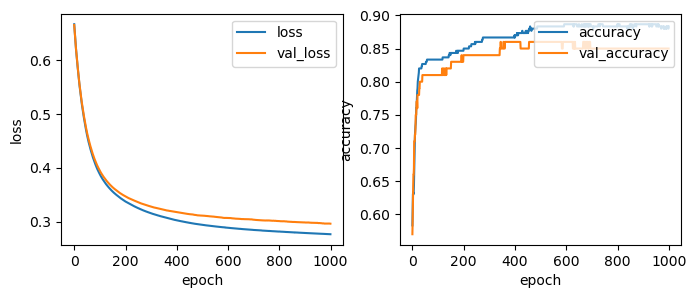

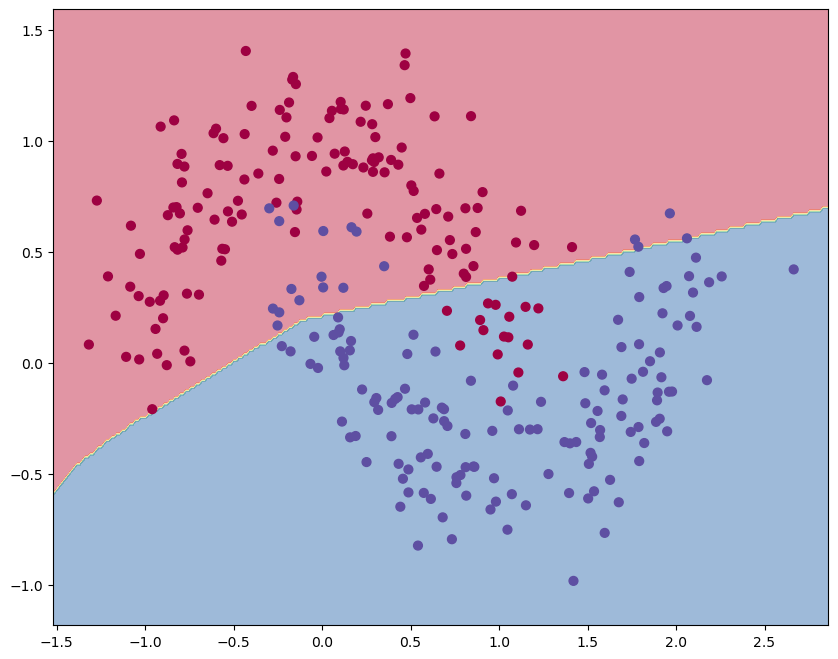

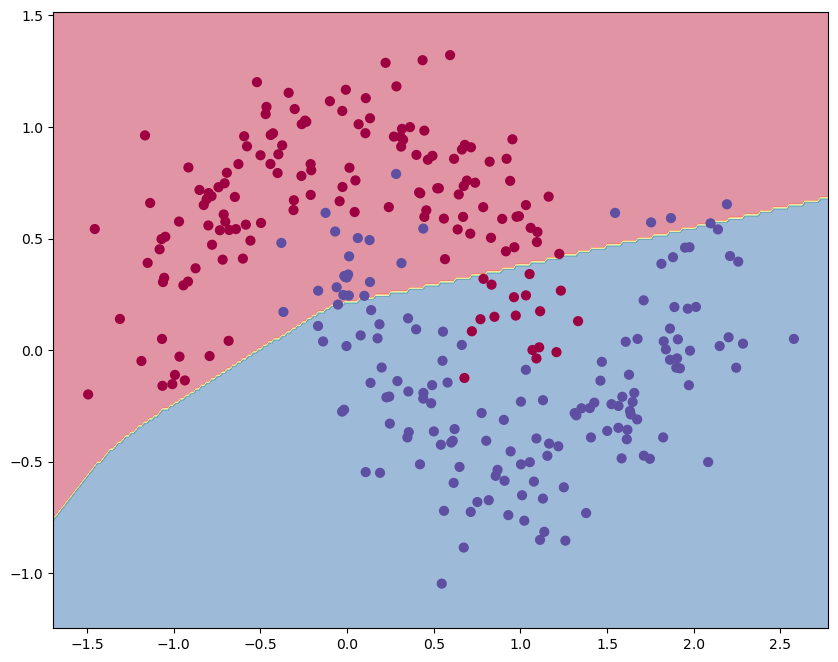

In [166]:
neurnet_moons = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=2, activation='softmax')  # 2 units for 2 classes
    ])

neurnet_moons.build(input_shape=(None, 2))
neurnet_moons.summary()

#train network
train_neurnet(neurnet_moons, X_moons, y_moons, X_moons_val, y_moons_val, n_epochs=1_000)

#visualize decision boundaries
plot_classifier(X_moons, y_moons, neurnet_moons)
plot_classifier(X_moons_test, y_moons_test, neurnet_moons)


<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Lake_Baikal_in_winter.jpg" width=300 style="padding: 10px; float: right;">


## Problem 4: Frozen: Navigating a random environment (25 points)

In class we introduce the Q-learning algorithm using the Taxi problem from the OpenAI `gym` package. In this problem we will explore another toy reinforcement learning problem, called  "Frozen Lake". In this problem you need to walk over a grid that represents a partially frozen lake, being careful not to fall through holes in the ice. (The author of this problem fell through the ice in a frozen lake when he was a kid&mdash;at night! It was quite an experience...) The environment is a simple 4x4 grid, and the goal is to walk from one corner to the other without falling through.

Unlike the Taxi problem, but more like Tic-Tac-Toe as discussed in class, there are no intermediate rewards. Rather the reward is 1 if you succeed, and 0 otherwise. `Frozen Lake` has two versions. In the first version, the ice is (unrealistically) not slippery. Here the state transitions are deterministic: If you move right, you go right. In the second version, the state transitions are probabilistic: If you try to move right, you may go left, down, or up. Naturally, the slippery version is more challenging. 

Your task in this problem will be to complete the implementation of the Q-learning algorithm for this problem, display the value function, and then evaluate the solution. You'll do this for both the deterministic and random (slippery) versions.

First load the necessary packages. You'll probably need to install `gym`, and can use `!pip install gym`. If you have difficulties let us know and we'll try to help.

In [167]:
#!pip install gym

In [168]:
import gym
import numpy as np
from IPython.display import clear_output
from time import sleep
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

Here is the "ascii art" rendition of the starting state. You start in the upper left corner, marked `S`, and the goal is to get to the lower right corner, marked `G`. The ice has four holes, marked `H`; if you step here you fall through the ice and the episode is done. But as you learn, you do not know where the holes are. We'll first use the deterministic version, by specifying `is_slippery=False`.

This code was written and tested with `gym` version 0.26.2.

In [169]:
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode='ansi')

Here are some simple helper functions, same as we used for the Taxi demo. Don't change the cell below, just run it.

In [170]:
def render(env, stat, action, reward):
    return {'frame': env.render(),
            'state': state,
            'action': action,
            'reward': reward}


def print_frames(frames, delay=.1):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(delay)
        
def display_value_function(q_table):
    v = np.max(q_table, axis=1)
    plt.imshow(v.reshape(4,4))
    plt.axis('off')
    plt.colorbar()
    plt.show()
    print(np.round(v.reshape(4,4), 3))

def evaluate_Q_function(env, q_table, epsilon=.001, episodes=1000):
    total_steps, total_successes = 0, 0
    
    for _ in range(episodes):
        state, *_ = env.reset()
        steps, reward = 0, 0
        done = False
        while not done:
            if random.uniform(0, 1) < epsilon:
               action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values
    
            next_state, reward, done, *_ = env.step(action)
            state = next_state
            steps += 1

        total_successes += reward
        total_steps += steps
    
    print(f"Results after {episodes} episodes:")
    print(f"Average steps per episode: {total_steps / episodes}")
    print(f"Chance of success: {total_successes / episodes}")
    
def sample_episode(env, q_table, epsilon=.001):
    state, *_ = env.reset()
    steps, reward = 0, 0
    done = False
    frames = []
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values
        state, reward, done, *_ = env.step(action)
        frames.append(render(env, state, action, reward))
        steps += 1
    return frames

In the cell below, we simply walk around randomly, calling the `sample()` function to choose an action. At the end of the episode, the steps are displayed. If you're lucky, you'll make it to the goal; more likely is that you fall through the ice. Try it out a few times to make sure you understand how it works.

In [171]:
env.reset()
steps = 0
reward = 0
frames = [] 

done = False
while not done:
    action = env.action_space.sample() # choose a random action
    state, reward, done, *_ = env.step(action)
    frames.append(render(env, state, action, reward))
    steps += 1
    

print_frames(frames, delay=.5)
print(f"\nSteps taken: {steps}, success: {reward}")


  (Down)
SFFF
FHFH
FFFH
HFFG

Timestep: 4
State: 5
Action: 1
Reward: 0.0

Steps taken: 4, success: 0.0


### Problem 4.1: Complete the Implementation of Q-learning

In the cell below we have started you off with a partial implementation of Q-learning. Your job is to finish the implementation. You'll then use your implementation to learn the Q-function for both the deterministic and random versions of the environment. 

The function declaration looks like this:

```python
def Q_learning(env, alpha=.1, gamma=.7, epsilon=.1, episodes=10000):
```

with the following arguments:

* `env` is the environment. We pass this in because we're going to have slippery and non-slippery versions.
* `alpha` is the step size
* `gamma` is the discount for future rewards
* `epsilon` is the probability of exploring
* `episodes` is the number of training episodes to use. 

Some hints:

* The Q-table is intialized to have all values 1/2. When you transition to a state and the value of `done` is `True`, there are two possibilities: (1) You fell through a hole in the ice or (2) you reached the goal (congratulations!)

* The value of the Q-function for these states (with all actions) should be zero; no future reward is possible.  You don't know where the holes in the ice are (even though you could "cheat" and read them off the rendering of the environment.

* If you reached the goal, which is state 15, the value of the reward when you transition to this state will be 1.

* All values of the Q-function should be less than or equal to 1---the value can be interpreted as the probability of reaching the goal starting from the state/action pair.

* You should only need 3-5 lines of code to complete the implementation! If you find yourself using more, you may want to rethink your approach.


In [172]:
def Q_learning(env, alpha=.1, gamma=.7, epsilon=.1, episodes=10000):
    q_table = 0.5*np.ones([env.observation_space.n, env.action_space.n])
    for _ in tqdm(np.arange(episodes)):
        state, *_ = env.reset()
        done = False
        while not done:
            explore = False
            if random.uniform(0, 1) < epsilon:
                explore = True
                action = env.action_space.sample() # Explore action space
            else:
                action = np.argmax(q_table[state]) # Exploit learned values
            next_state, reward, done, *_ = env.step(action) 
            
            ### Finish the implementation below. Only 3-5 lines of code needed.
            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            state = next_state
            
    return q_table

### Problem 4.2

Now use the function `Q_learning` that you just wrote, and explore different settings 
of the parameters. The following cells carry out the following steps:

1. Create the environment
1. Run Q-learning. This is where you can experiment with different parameters
1. Display the value function `v(s) = np.max(q_table[s])`
1. Describe the value function, and how the numerical values make sense
1. Run `evaluate_Q_function` to get statistics on how well it works
1. Comment on the evaluation statistics
1. Print out a sample episode

The only line you need to change is the call to `Q_learning`, which is where you 
select the parameters. *Do not change the other cells*. You will be graded according 
to your implementation; these are checks to make sure it is working properly.

In [173]:
# do not change
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode='ansi')

100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 12039.04it/s]


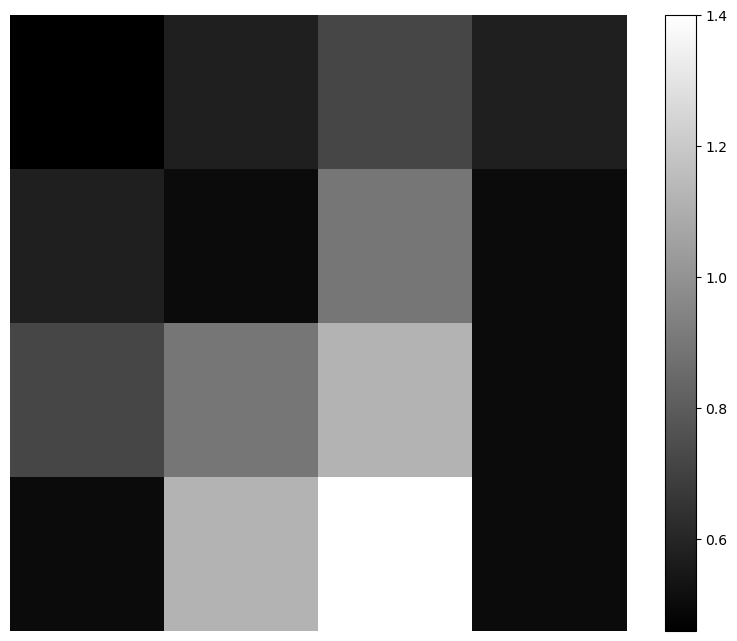

[[0.459 0.573 0.717 0.573]
 [0.573 0.5   0.896 0.5  ]
 [0.717 0.896 1.12  0.5  ]
 [0.5   1.12  1.4   0.5  ]]


In [174]:
# only change the following line, to set parameters
q_table = Q_learning(env, alpha=.9, gamma=.8, epsilon=.7, episodes=1000)
display_value_function(q_table)

Describe the value function above. Do the numerical values in different states make sense? Why or why not? Explain.

*The value function represents the maximum expected future rewards the agent can achieve from each state. In the deterministic version, where the ice is not slippery, the agent has more control, and hence the values will likely be higher in states closer to the goal, reflecting a higher probability of reaching the goal.*

In [175]:
# just run this cell
evaluate_Q_function(env, q_table)

Results after 1000 episodes:
Average steps per episode: 6.001
Chance of success: 0.999


Do the evaluate statistics make sense? How do they compare to the random environment below? Explain.

*The evaluation statistics show a high success rate and moderately low number of average steps per episode, meaning that the Q-learning algorithm has learned an effective policy for navigating the environment. The high success rate demonstrates the effectiveness of the learned Q-values in guiding the agent to the goal. The slight overestimation in the Q-table does not appear to negatively impact the agent's performance in this particular case.
The random environment below featured a successful episode with 6 steps taken. This was expected according to the deterministic environment's 100% success rate and average of 6 steps per episode.*

In [176]:
# just run this cell
frames = sample_episode(env, q_table)
print_frames(frames, delay=.1)

  (Right)
SFFF
FHFH
FFFH
HFFG

Timestep: 6
State: 5
Action: 2
Reward: 1.0


### Problem 4.3

Now use the function `Q_learning` on the random environment, 
where `is_slippery=True`. You may want to play around with this a bit 
to make sure you understand how it differs from the case where `is_slippery=False`.
The difference is that there is randomness in the state transitions for each 
action. If you try to go down, you may go right, for example.

As above, you run the following steps:

1. Create the environment
1. Run Q-learning. This is where you can experiment with different parameters
1. Display the value function `v(s) = np.max(q_table[s])`
1. Describe the value function, and how the numerical values make sense
1. Run `evaluate_Q_function` to get statistics on how well it works
1. Comment on the evaluation statistics
1. Print out a sample episode

The only line you need to change is the call to `Q_learning`, which is where you 
select the parameters. *Do not change the other cells*. You will be graded according 
to your implementation; these are checks to make sure it is working properly.

In [177]:
#random_env = gym.make("FrozenLake-v1", is_slippery=False, render_mode='ansi')
#q_table = Q_learning(random_env, alpha=.9, gamma=.9, epsilon=.8, episodes=1000)
#display_value_function(q_table)

In [178]:
# Do not change
random_env = gym.make("FrozenLake-v1", is_slippery=True, render_mode='ansi')

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 9384.99it/s]


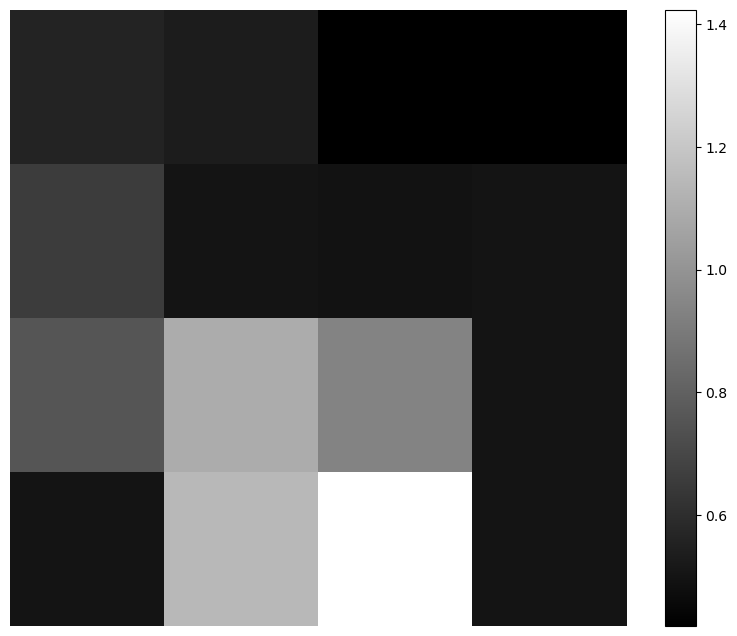

[[0.558 0.533 0.419 0.42 ]
 [0.659 0.5   0.492 0.5  ]
 [0.757 1.096 0.937 0.5  ]
 [0.5   1.144 1.423 0.5  ]]


In [179]:
# only change the following line, to set parameters
q_table = Q_learning(random_env, alpha=.9, gamma=.9, epsilon=.8, episodes=1000)
display_value_function(q_table)

Describe the value function above. Do the numerical values in different states make sense? Why or why not? Explain.

*The values generally increase as they approach the lower right corner, the goal, which is expected. Higher values in states closer to the goal indicate a higher expected reward, suggesting that the agent has learned a potentially successful strategy. Ideally, values should be less than or equal to 1; values above 1 (like 1.305 or 1.45) indicate some overestimation. This can occur due to the learning process in Q-learning, especially in a stochastic environment, and, while undesirable, might not severely impact performance in this context. The slippery environment introduces randomness in movement, making it more challenging to learn precise value estimates. The slightly higher values in some states might reflect this challenge.*

In [180]:
# just run this cell
evaluate_Q_function(random_env, q_table)

Results after 1000 episodes:
Average steps per episode: 27.888
Chance of success: 0.159


Do the output statistics make sense? How do they compare to the deterministic environment?Explain.

*The success rate in the deterministic environment (100%) was significantly higher than the random environment's low success rate of 4.3%. This expectedly reflects the increased difficulty of the slippery version of the environment. In a stochastic setting, the agent's chosen action may not lead to the expected outcome, thus making it much harder to reach the goal consistently. The number of average steps per episode was quite similar to that in the deterministic enviroment, which susggests that regardless, the agent often does not take the most direct path to the goal.*

In [181]:
# just run this cell
frames = sample_episode(random_env, q_table)
print_frames(frames, delay=.1)

  (Left)
SFFF
FHFH
FFFH
HFFG

Timestep: 19
State: 5
Action: 0
Reward: 0.0


*[Add any discussion of your implementation and findings that you wish to share. Nothing specific is required.]*

## Bonus question

What is the common theme of all of the problem names?

**They all feature Disney/Pixar movie titles.**